**코드정리**

# Introduction
- 머신러닝 12팀에서 사용한 데이터는 iFood Market 기업에서 실제로 Data Anaylsis를 채용하기 위해 2020년에 시행된 시험데이터입니다. [iFoodMarket링크]('https://www.godaddy.com/forsale/ifoodmarket.com) 
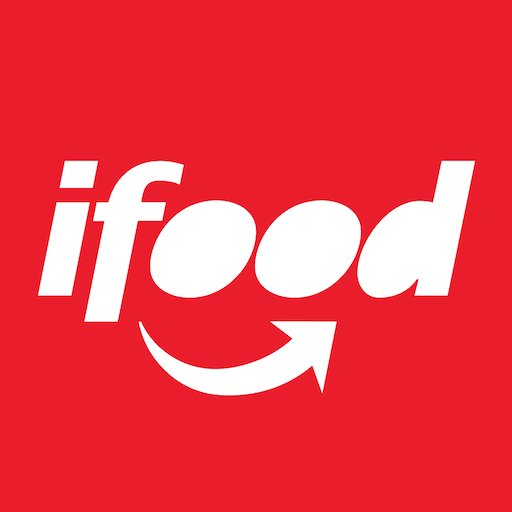
- 머신러닝 12팀은 이 데이터를 통해서 고객Segmentation을 진행합니다.

- 전통적인 고객분류를 하는 CRM, RFM, CFD마케팅을 벗어나, 시대에 맞게 빅데이터분석을 통해 고객의 일정한 기준으로 분류하고, 각 고객들의 패턴을 추출 그리고 해결전략을 제시합니다. 


## Data Description
- 다음의 데이터는 한 매장에서 5번째 이벤트를 진행하기 전에 설문조사 결과를 다루고 있습니다. 

- 총 2240명의 각각의 고객들에 대해 39개의 라벨링이 되어있는 feature를 포함하는 정형데이터 입니다.



## Module Import 

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.options.display.max_columns=39


import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.filterwarnings(action='default')

from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans  


from Preprocessing import preprocess

In [30]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family'] = 'Malgun Gothic' ## 본인컴퓨터에 알맞는 font를 font_list에서 골라서 지정

['STIXSizeThreeSym',
 'DejaVu Sans',
 'cmex10',
 'STIXSizeFiveSym',
 'cmb10',
 'cmr10',
 'DejaVu Serif',
 'DejaVu Sans Mono',
 'DejaVu Serif Display',
 'STIXGeneral',
 'STIXSizeFourSym',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'DejaVu Sans',
 'cmss10',
 'DejaVu Sans Display',
 'cmmi10',
 'STIXSizeOneSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'STIXSizeTwoSym',
 'DejaVu Serif',
 'cmsy10',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'STIXSizeThreeSym',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'Consolas',
 'Rockwell',
 'Sitka',
 'Lucida Fax',
 'Old English Text MT',
 'Microsoft Himalaya',
 'Bodoni MT',
 'Juice ITC',
 'Segoe UI',
 'STLiti',
 'Century Schoolbook',
 'Symbol',
 'Calisto MT',
 'Arial',
 'Arial',
 'Vladimir Script',
 'Tw Cen MT',
 'STCaiyun',
 'Bell MT',
 'Arial',
 'Ravie',
 'Lucida Bright',
 'Onyx',
 'Candara',
 'Nir

## Data Load

In [2]:
project_df = pd.read_csv('./ml_project1_data.csv')
data = pd.read_csv('./with_cluster_df2.csv', index_col=0) # 클러스터링후의 데이터 

이 데이터는 5번째 이벤트에 대해 설문조사에 참여한 2240명에 고객들에 대해, 39개의 feature를 가지는 데이터입니다.

In [3]:
len(project_df), len(project_df.columns)

(2240, 29)

feature들은 다음과 같습니다.

In [4]:
project_df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

범주형 변수와, 연속형 변수 분류

Year_Birth :  {1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1893, 1899, 1900}
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900

<AxesSubplot:>



Education :  {'Master', 'PhD', 'Basic', 'Graduation', '2n Cycle'}
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


<AxesSubplot:>



Marital_Status :  {'Divorced', 'Alone', 'Together', 'Widow', 'Absurd', 'Single', 'YOLO', 'Married'}
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


<AxesSubplot:>



Income


Kidhome :  {0, 1, 2}
0    1293
1     899
2      48
Name: Kidhome, dtype: int64


<AxesSubplot:>



Teenhome :  {0, 1, 2}
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


<AxesSubplot:>



Dt_Customer


Recency


MntWines


MntFruits


MntMeatProducts


MntFishProducts


MntSweetProducts


MntGoldProds


NumDealsPurchases :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15}
1     970
2     497
3     297
4     189
5      94
6      61
0      46
7      40
8      14
9       8
15      7
10      5
11      5
12      4
13      3
Name: NumDealsPurchases, dtype: int64


<AxesSubplot:>



NumWebPurchases :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 23, 25, 27}
2     373
1     354
3     336
4     280
5     220
6     205
7     155
8     102
9      75
0      49
11     44
10     43
27      2
23      1
25      1
Name: NumWebPurchases, dtype: int64


<AxesSubplot:>



NumCatalogPurchases :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 22, 28}
0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64


<AxesSubplot:>



NumStorePurchases :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}
3     490
4     323
2     223
5     212
6     178
8     149
7     143
10    125
9     106
12    105
13     83
11     81
0      15
1       7
Name: NumStorePurchases, dtype: int64


<AxesSubplot:>



NumWebVisitsMonth :  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 17, 19, 20}
7     393
8     342
6     340
5     281
4     218
3     205
2     202
1     153
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64


<AxesSubplot:>



AcceptedCmp3 :  {0, 1}
0    2077
1     163
Name: AcceptedCmp3, dtype: int64


<AxesSubplot:>



AcceptedCmp4 :  {0, 1}
0    2073
1     167
Name: AcceptedCmp4, dtype: int64


<AxesSubplot:>



AcceptedCmp5 :  {0, 1}
0    2077
1     163
Name: AcceptedCmp5, dtype: int64


<AxesSubplot:>



AcceptedCmp1 :  {0, 1}
0    2096
1     144
Name: AcceptedCmp1, dtype: int64


<AxesSubplot:>



AcceptedCmp2 :  {0, 1}
0    2210
1      30
Name: AcceptedCmp2, dtype: int64


<AxesSubplot:>



Complain :  {0, 1}
0    2219
1      21
Name: Complain, dtype: int64


<AxesSubplot:>



Z_CostContact :  {3}
3    2240
Name: Z_CostContact, dtype: int64


<AxesSubplot:>



Z_Revenue :  {11}
11    2240
Name: Z_Revenue, dtype: int64


<AxesSubplot:>



Response :  {0, 1}
0    1906
1     334
Name: Response, dtype: int64


<AxesSubplot:>

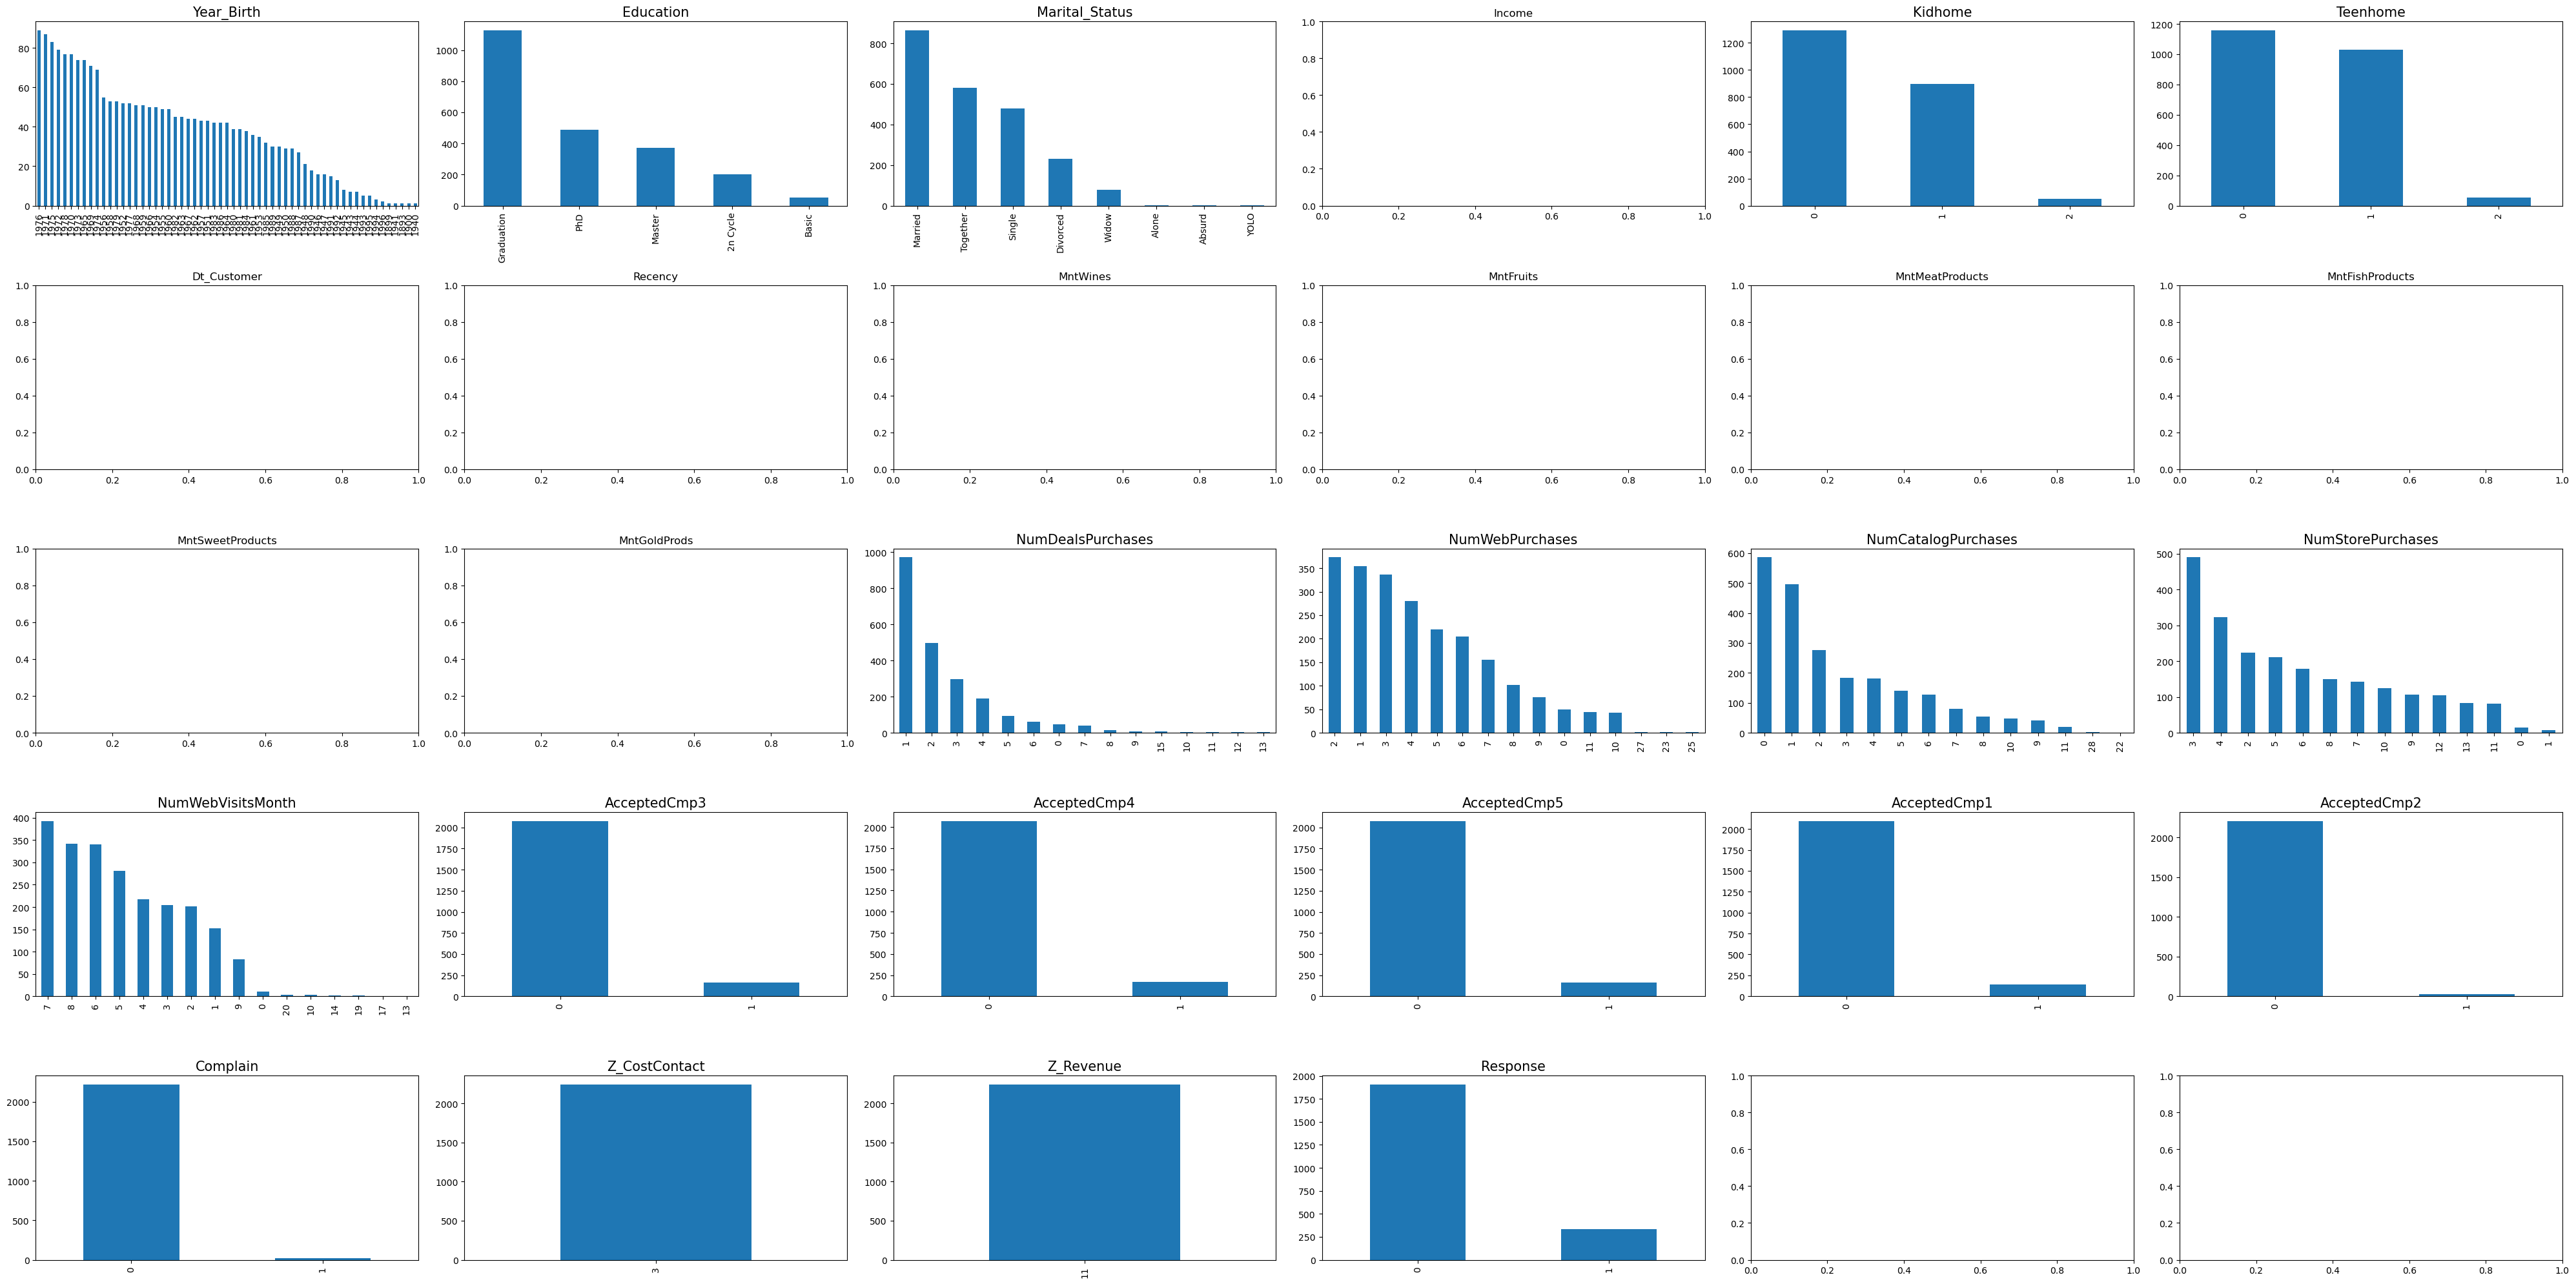

In [5]:
fig = plt.figure(figsize = (40, 20))
axs = fig.subplots(5,6).flatten()

categorical_li = []
numeric_li = []
for ii, col in enumerate(project_df.columns[1:]):
    if len(set(project_df[col])) < 100:
        categorical_li.append(col)
        
        print('{} : '.format(col), set(project_df[col]))
        print(project_df[col].value_counts())
        project_df[col].value_counts().plot(kind='bar',ax=axs[ii])
        _=axs[ii].set_title('{}'.format(col), fontsize=15)
    else :
        numeric_li.append(col)
        print(col)
        _=axs[ii].set_title('{}'.format(col))
    print('\n')
fig.tight_layout()

In [6]:
categorical_li

['Year_Birth',
 'Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [7]:
numeric_li

['Income',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds']

In [8]:
## 결측치 확인 
project_df['Income'].isna().sum()

24

In [9]:
## 결측치에 해당하는 데이터 확인
project_df[project_df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


### Num변수들 살펴보기 

(array([ 46., 970., 497., 297., 189.,  94.,  61.,  40.,  14.,   8.,   5.,
          5.,   4.,   3.,   7.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15.]),
 <BarContainer object of 15 artists>)

Text(0.5, 1.0, 'NumDealsPurchases')

(array([403., 709., 500., 360., 102., 118.,  44.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   2.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ,
        19.8, 21.6, 23.4, 25.2, 27. ]),
 <BarContainer object of 15 artists>)

Text(0.5, 1.0, 'NumWebPurchases')

(array([1.083e+03, 4.600e+02, 3.220e+02, 2.070e+02, 9.700e+01, 6.700e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.,
        26., 28.]),
 <BarContainer object of 14 artists>)

Text(0.5, 1.0, 'NumCatalogPurchases')

(array([ 15.,   7., 223., 490., 323., 212., 178., 143., 149., 106., 125.,
         81., 105.,  83.]),
 array([ 0.        ,  0.92857143,  1.85714286,  2.78571429,  3.71428571,
         4.64285714,  5.57142857,  6.5       ,  7.42857143,  8.35714286,
         9.28571429, 10.21428571, 11.14285714, 12.07142857, 13.        ]),
 <BarContainer object of 14 artists>)

Text(0.5, 1.0, 'NumStorePurchases')

(array([164., 202., 205., 218., 621., 393., 342.,  83.,   3.,   0.,   1.,
          2.,   0.,   1.,   0.,   5.]),
 array([ 0.  ,  1.25,  2.5 ,  3.75,  5.  ,  6.25,  7.5 ,  8.75, 10.  ,
        11.25, 12.5 , 13.75, 15.  , 16.25, 17.5 , 18.75, 20.  ]),
 <BarContainer object of 16 artists>)

Text(0.5, 1.0, 'NumWebVisitsMonth')

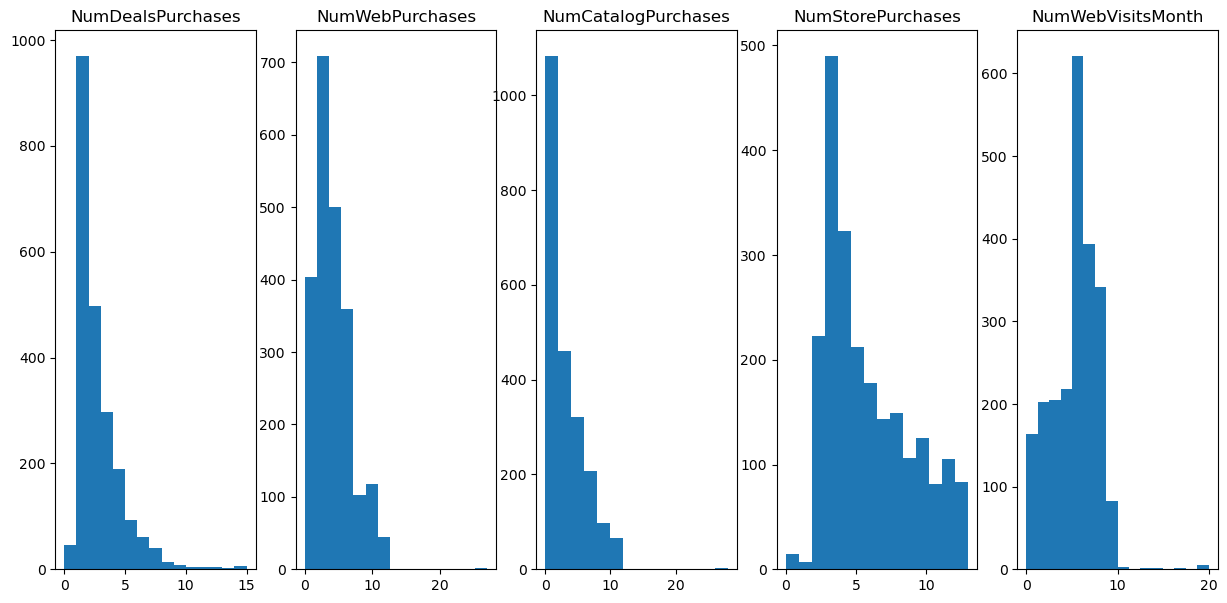

In [10]:
fig = plt.figure(figsize=(15, 7))
ax = fig.subplots(1,5)

num_li = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

for ii, col in enumerate(num_li):
    ax[ii].hist(project_df[col], bins=len(set(project_df[col])))
    ax[ii].set_title('{}'.format(col))



### Mnt변수들 살펴보기 

(array([50., 72., 73., 59., 58., 47., 39., 46., 26., 39., 17., 34., 26.,
        10., 21., 30., 17., 16., 14., 16., 16., 10., 10., 15.,  8.,  4.,
         7.,  9.,  6., 14.,  3.,  2., 12.,  7.,  8., 12., 11.,  8.,  3.,
         4.,  5.,  8.,  6.,  5.,  9.,  7.,  4.,  4.,  2.,  5.,  8., 10.,
         1.,  4.,  5.,  2.,  3.,  7.,  9.,  1.,  4.,  0.,  5.,  5.,  5.,
         0.,  3.,  6.,  2.,  3.,  7.,  5.,  3.,  4.,  5.,  4.,  0.,  0.,
         2.,  5.,  7.,  3., 10.,  5., 13.,  2.,  9.,  2.,  5., 12.,  3.,
         3.,  2.,  6.,  6.,  7.,  4.,  3.,  4.,  3.,  4.,  2.,  3.,  8.,
         7.,  3.,  6.,  4.,  5.,  2.,  6.,  3.,  6.,  3.,  2.,  1.,  5.,
         4.,  2.,  8.,  4.,  4.,  4.,  2.,  8.,  2.,  7.,  3.,  4.,  1.,
         3.,  0.,  6.,  1.,  2.,  3.,  2.,  5.,  8.,  4.,  3.,  3.,  5.,
         2.,  0.,  5.,  1.,  7.,  1.,  1.,  1.,  8.,  6.,  4.,  5.,  1.,
         3.,  2.,  2.,  2.,  3.,  1.,  4.,  5.,  3.,  2.,  3.,  4.,  3.,
         2.,  2.,  2.,  3.,  1.,  4.,  1.,  3.,  4.

Text(0.5, 1.0, 'MntWines')

(0.0, 600.0)

(array([562., 120., 116., 169.,  62.,  67.,  48.,  77.,  29.,  50.,  17.,
         52.,  26.,  35.,  10.,  43.,  26.,  18.,  21.,  29.,  22.,  12.,
         25.,  18.,   9.,  12.,  23.,  25.,   9.,   6.,  14.,   8.,   2.,
         14.,  24.,   6.,   5.,  10.,  14.,  11.,  10.,   0.,  19.,   4.,
          3.,   3.,  12.,   6.,  14.,   2.,  12.,   3.,   6.,   7.,   3.,
          5.,   7.,  13.,   3.,   2.,   8.,   2.,   2.,  15.,   6.,   8.,
          4.,   2.,   6.,   4.,   3.,   2.,   5.,   7.,   0.,   0.,   3.,
          7.,   3.,   3.,   6.,   1.,   3.,   5.,  11.,   5.,   0.,   0.,
          7.,   0.,   6.,   4.,   2.,   0.,   0.,   5.,   2.,   2.,   2.,
          0.,   5.,   0.,   8.,   1.,   3.,   3.,   5.,   0.,   4.,   8.,
          0.,   1.,   4.,   1.,   2.,   0.,   3.,   2.,   1.,   3.,   2.,
          4.,   1.,   2.,   0.,   0.,   2.,   6.,   4.,   1.,   1.,   1.,
          0.,   3.,   2.,   0.,   5.,   0.,   1.,   0.,   0.,   3.,   0.,
          1.,   0.,   3.,   3.,   0., 

Text(0.5, 1.0, 'MntFruits')

(0.0, 600.0)

(array([ 85., 123., 137., 124.,  87.,  83.,  69.,  57.,  47.,  43.,  34.,
         20.,  25.,  17.,  30.,  21.,  21.,  17.,  24.,  23.,  17.,  30.,
         25.,  16.,  16.,  14.,  17.,  12.,  14.,  18.,   7.,  13.,  27.,
          8.,  23.,   9.,  13.,  10.,  13.,   6.,  18.,  14.,   9.,  24.,
         10.,  17.,   7.,   2.,   5.,  10.,   7.,   7.,   9.,   5.,  13.,
         10.,   3.,  12.,   7.,   7.,   3.,   4.,   4.,   6.,   3.,   9.,
          9.,   2.,   4.,  13.,  14.,   2.,   6.,   4.,   5.,   5.,   6.,
         10.,   5.,   1.,  10.,   7.,   6.,   8.,   1.,   8.,   4.,   8.,
          3.,   5.,   5.,   3.,   4.,   2.,   8.,   2.,   2.,   4.,   6.,
          5.,   3.,   2.,   1.,   3.,   9.,   0.,   1.,   2.,   3.,   3.,
          2.,   4.,   4.,   8.,   3.,   4.,   3.,   4.,   2.,   3.,   4.,
          5.,   3.,   1.,   5.,   6.,   3.,   2.,   8.,   8.,   2.,   4.,
          3.,   7.,   6.,   5.,   3.,   4.,   3.,   9.,   1.,   0.,   2.,
          4.,   8.,   4.,   2.,   3., 

Text(0.5, 1.0, 'MntMeatProducts')

(0.0, 600.0)

(array([394., 156., 238.,   1., 148.,  58.,   0., 101.,  47.,  48.,  38.,
         62.,   0.,  36.,  57.,   0.,  38.,  18.,  12.,  19.,  20.,  15.,
         17.,  32.,   2.,   8.,  24.,  16.,  12.,  11.,  13.,   8.,  12.,
          6.,   8.,  20.,  11.,   6.,  11.,   5.,  10.,   6.,  10.,   8.,
         16.,  15.,   0.,   7.,  14.,   9.,   5.,   5.,  12.,   6.,  10.,
          0.,  14.,   5.,   0.,  13.,   6.,   0.,   4.,  11.,   0.,   7.,
         12.,   0.,   9.,  10.,   3.,   4.,   2.,  14.,   7.,   2.,   0.,
          6.,   7.,   0.,   3.,   5.,   0.,   7.,   5.,   3.,   5.,   5.,
          0.,   3.,   2.,   4.,   3.,   5.,   4.,   2.,  10.,   0.,   2.,
          3.,   0.,   6.,   3.,   2.,   5.,  10.,   6.,   3.,   0.,   2.,
          0.,   4.,   7.,   1.,   0.,   2.,   1.,   1.,   9.,   0.,   5.,
          3.,   3.,   0.,   2.,   5.,   5.,   4.,   0.,   2.,   5.,   0.,
          4.,   0.,   2.,   2.,   1.,   0.,   3.,   4.,   0.,   5.,   0.,
          0.,   3.,   2.,   2.,   5., 

Text(0.5, 1.0, 'MntFishProducts')

(0.0, 600.0)

(array([580., 128., 183.,  65., 121.,  56.,  80.,  26.,  76.,  41.,  47.,
         23.,  33.,  20.,  38.,  15.,  34.,  22.,  26.,  13.,  32.,  13.,
         17.,  18.,  13.,  17.,  17.,   7.,  19.,  12.,  17.,   6.,  18.,
          9.,   6.,   5.,  11.,  12.,   5.,  14.,   5.,  12.,   2.,   6.,
          9.,   8.,   5.,   9.,   6.,   6.,   4.,   9.,   4.,  10.,   2.,
          8.,   3.,   5.,   3.,   9.,   0.,  15.,   3.,   6.,   3.,  11.,
          1.,   4.,   6.,   3.,   4.,   2.,  11.,   1.,   2.,   5.,   3.,
          4.,   2.,   5.,   3.,   3.,   6.,   1.,   6.,   1.,   3.,   1.,
          1.,   6.,   3.,   1.,  11.,   1.,   2.,   1.,   6.,   1.,   4.,
          2.,   4.,   5.,   5.,   0.,   1.,   1.,   0.,   3.,   4.,   5.,
          0.,   3.,   1.,   2.,   0.,   3.,   1.,   3.,   2.,   2.,   1.,
          0.,   1.,   0.,   2.,   1.,   1.,   2.,   1.,   3.,   3.,   2.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

Text(0.5, 1.0, 'MntSweetProducts')

(0.0, 600.0)

(array([134., 131., 133.,  57.,  94.,  93.,  46.,  93.,  83.,  31.,  70.,
         65.,  48.,  19.,  43.,  63.,  23.,  51.,  36.,  20.,  46.,  34.,
         40.,  20.,  46.,  27.,  16.,  22.,  24.,  13.,  15.,  32.,  14.,
         13.,  15.,  13.,   3.,  17.,  16.,   4.,   8.,  12.,  11.,   2.,
         18.,   8.,   6.,  17.,  11.,   6.,   9.,   8.,  12.,   7.,  14.,
          7.,   4.,   8.,  11.,   3.,   7.,   0.,  15.,   9.,   6.,   7.,
          0.,   7.,   8.,   2.,   6.,   5.,   4.,   6.,   7.,   5.,   5.,
          5.,  11.,   2.,   1.,   5.,   5.,   3.,   6.,   7.,   4.,   4.,
          5.,   3.,  10.,   1.,   2.,   2.,   2.,   5.,   0.,   3.,   3.,
          1.,   4.,   8.,   7.,   3.,   2.,   1.,   1.,   8.,   2.,   0.,
          3.,   3.,   9.,   0.,   2.,   4.,   1.,   4.,   0.,   2.,   4.,
          1.,   0.,   2.,   0.,   0.,   1.,   1.,   3.,   0.,   0.,   5.,
          0.,   3.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   6.,   2.,
          0.,   2.,   2.,   1.,   0., 

Text(0.5, 1.0, 'MntGoldProds')

(0.0, 600.0)

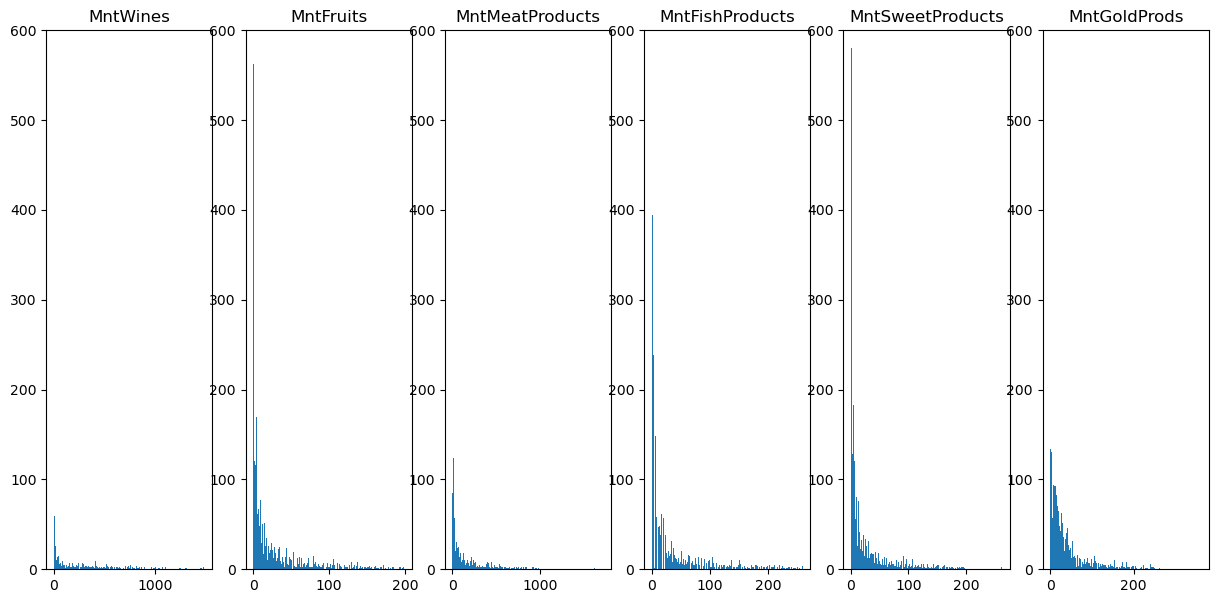

In [11]:
Mnt_li = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']

fig = plt.figure(figsize=(15, 7))
ax = fig.subplots(1,len(Mnt_li))



for ii, col in enumerate(Mnt_li):
    ax[ii].hist(project_df[col], bins=len(set(project_df[col])))
    ax[ii].set_title('{}'.format(col))
    ax[ii].set_ylim(0,600)


### Accepted변수들 분포 

(array([2096.,  144.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

Text(0.5, 1.0, 'AcceptedCmp1')

(array([2210.,   30.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

Text(0.5, 1.0, 'AcceptedCmp2')

(array([2077.,  163.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

Text(0.5, 1.0, 'AcceptedCmp3')

(array([2073.,  167.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

Text(0.5, 1.0, 'AcceptedCmp4')

(array([2073.,  167.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

Text(0.5, 1.0, 'AcceptedCmp4')

(array([1906.,  334.]),
 array([0. , 0.5, 1. ]),
 <BarContainer object of 2 artists>)

Text(0.5, 1.0, 'Response')

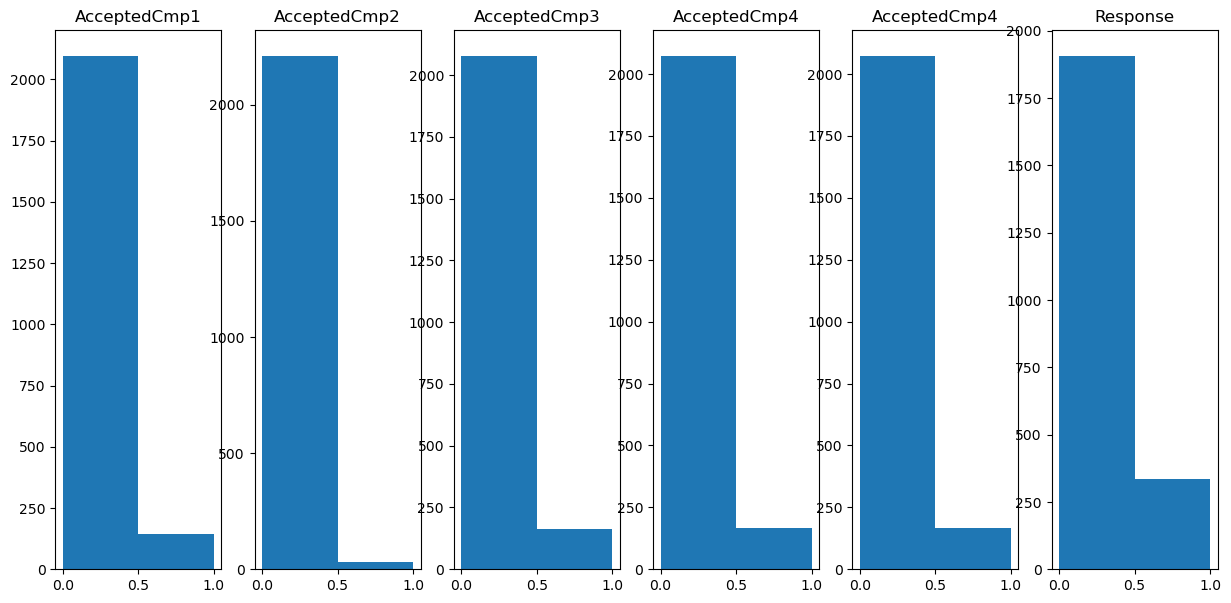

In [12]:
accept_li = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp4', 'Response']

fig = plt.figure(figsize=(15, 7))
ax = fig.subplots(1,len(accept_li))



for ii, col in enumerate(accept_li):
    ax[ii].hist(project_df[col], bins=len(set(project_df[col])))
    ax[ii].set_title('{}'.format(col))


# Preprocessing

In [13]:
project_df = pd.read_csv('./ml_project1_data.csv')
project_df = preprocess(project_df)
print(project_df.shape)

(2216, 33)


In [14]:
project_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all
0,5524,0.986443,2,5,0.234063,0,0,2012-09-04,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,1,2012,9,4,1.675488,1.620547
1,2174,1.236801,2,5,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,0,2014,3,8,-0.962358,-1.263455
2,4141,0.318822,2,2,0.769478,0,0,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0,2013,8,21,0.280250,0.659213
3,6182,-1.266777,2,2,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,0,2014,2,10,-0.919224,-0.851455
4,5324,-1.016420,4,7,0.240221,1,0,2014-01-19,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,0,2014,1,19,-0.307044,0.521879


# Modeling

- classification : 참여하는 지에 대한 정보
    - target : 'Response'
    - Randomforest Classification
    - 10fold
    - stratified
    - f1-score
- Regression : 고객들이 얼마나 지출하는지에 대한 정보 
    - target : 'Mnt_all'
    - Randomforest Regression
    - 10fold
    - stratified
    - MSE

In [15]:
features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 
 'Teenhome', 'Recency', 
 'MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
 'Complain', 'Accept_all', 
 'year', 'month','day', 
 'Num_all']

classification_target = ['Response']
regression_target = ['Mnt_all']

In [16]:
project_df[features]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Accept_all,year,month,day,Num_all
0,0.986443,2,5,0.234063,0,0,0.310532,0.978226,1.690227,1.549429,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,2012,9,4,1.620547
1,1.236801,2,5,-0.234559,1,1,-0.380509,-0.872024,-0.717986,-0.637328,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,2014,3,8,-1.263455
2,0.318822,2,2,0.769478,0,0,-0.795134,0.358511,-0.178368,0.569159,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,2013,8,21,0.659213
3,-1.266777,2,2,-1.017239,1,0,-0.795134,-0.872024,-0.655551,-0.561922,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,2014,2,10,-0.851455
4,-1.016420,4,7,0.240221,1,0,1.554407,-0.391671,-0.218505,0.418348,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,2014,1,19,0.521879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,0.151917,2,7,0.356642,0,1,-0.104093,1.197646,0.066913,0.418348,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,0,0,0,0,0,0,0,2013,6,13,0.384546
2212,1.904422,4,2,0.467539,2,1,0.241428,0.299208,-0.610954,-0.662463,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,0,0,0,1,0,0,1,2014,6,10,1.208546
2213,-1.016420,2,0,0.188091,0,0,1.450751,1.787710,0.223001,0.544024,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,0,1,0,0,0,0,2,2014,1,25,0.659213
2214,1.069896,3,2,0.675388,0,1,-1.417072,0.364441,0.209622,0.091591,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,0,0,0,0,0,0,0,2014,1,24,0.796546


### Classification Split & Modeling

#### First

In [17]:
features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 
 'Teenhome', 'Recency', 
 'MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
 'Complain', 'Accept_all', 
 'year', 'month','day', 
 'Num_all']

classification_target = ['Response']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(project_df[features], project_df[classification_target],
                                                    test_size=0.2, random_state=42,
                                                    stratify = project_df[classification_target])


clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
clf.predict(X_test)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\801986344.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=42)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
# Define the model
clf = RandomForestClassifier(max_depth=2, random_state=42)

# Define k-fold cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [20]:
# Perform cross-validation and calculate f1-scores
f1_scores = cross_val_score(clf, project_df[features], project_df[classification_target], cv=kf, scoring='f1_macro')

C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean f1-score: 0.5874340645015974
Standard deviation of f1-score: 0.03785295498353155


C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\929484872.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(project_df[features], project_df[classification_target])


RandomForestClassifier(max_depth=2, random_state=42)

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importances')

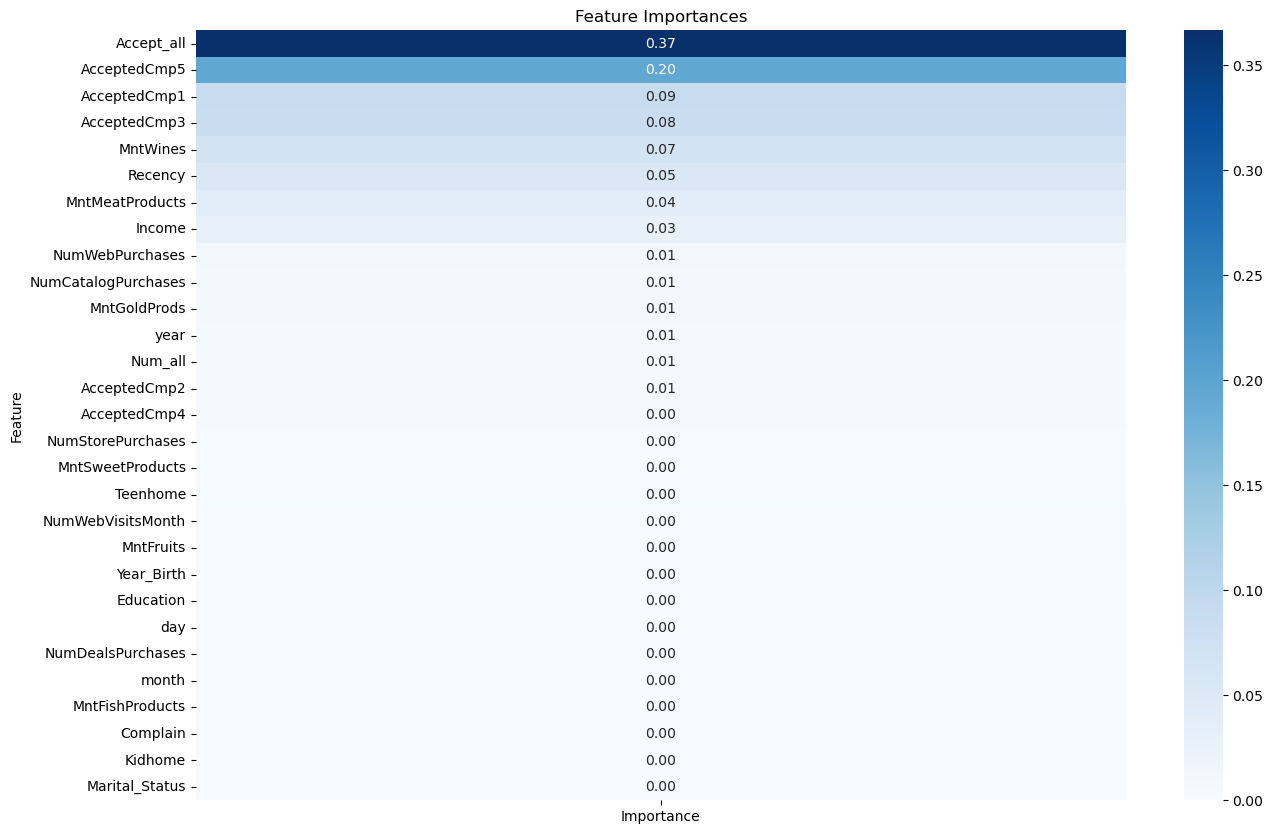

In [21]:
# Print the mean and standard deviation of f1-scores
print('Mean f1-score:', f1_scores.mean())
print('Standard deviation of f1-score:', f1_scores.std())

# Fit the model on the whole dataset and extract feature importances
clf.fit(project_df[features], project_df[classification_target])
importances = clf.feature_importances_

# Create a DataFrame with feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance
importances_df = importances_df.sort_values('Importance', ascending=False)

# Create a heatmap of feature importances
plt.figure(figsize=(15, 10))
sns.heatmap(importances_df.set_index('Feature'), cmap='Blues', annot=True, fmt='.2f')
plt.title('Feature Importances')
plt.show()

<AxesSubplot:>

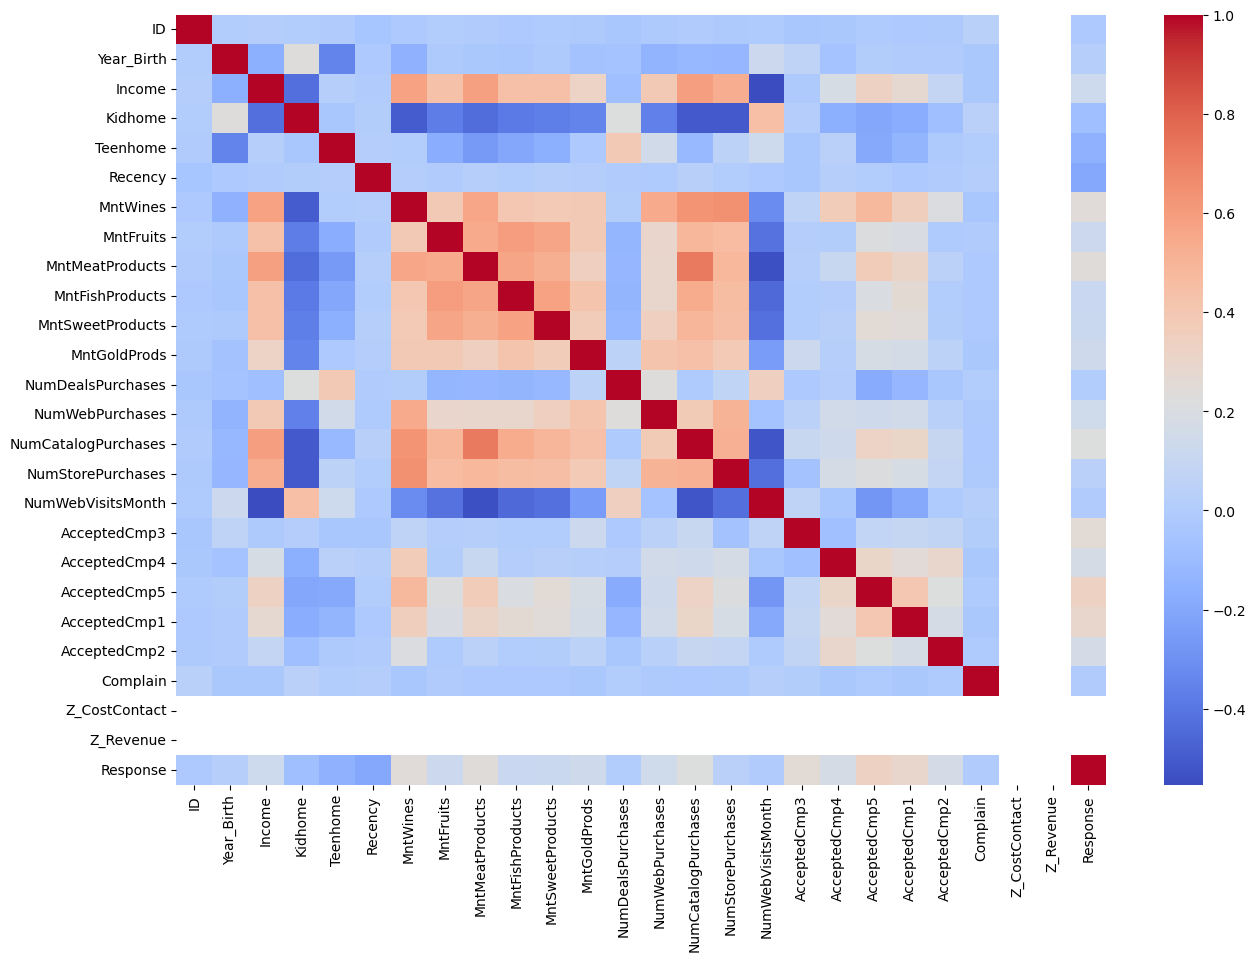

In [22]:
# 데이터 불러오기
data = pd.read_csv('./ml_project1_data.csv')

# heatmap 그리기
fig, ax2 = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', ax=ax2)


#cool 계열은 파란색 계열로 낮은 값을, warm 계열은 붉은색 계열로 높은 값

#### Second

- Accept_all : 0.3
- accept_cmp5 : 0.2
- accept_cmp1,3 : 0.9, 0.8
을 제외하고 중요 변수들을 뽑음

In [23]:
features = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 
 'Teenhome', 'Recency', 
 'MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
# 'AcceptedCmp3', 'AcceptedCmp5', 'Accept_all', 'AcceptedCmp1', 
#  'AcceptedCmp4', 'AcceptedCmp2', 
 'Complain',
 'year', 'month','day', 
 'Num_all']

classification_target = ['Response']

C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y wa

Mean f1-score: 0.4593278338874967
Standard deviation of f1-score: 0.005330935439327999


C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\4204447096.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(project_df[features], project_df[classification_target])


RandomForestClassifier(max_depth=2, random_state=42)

<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importances')

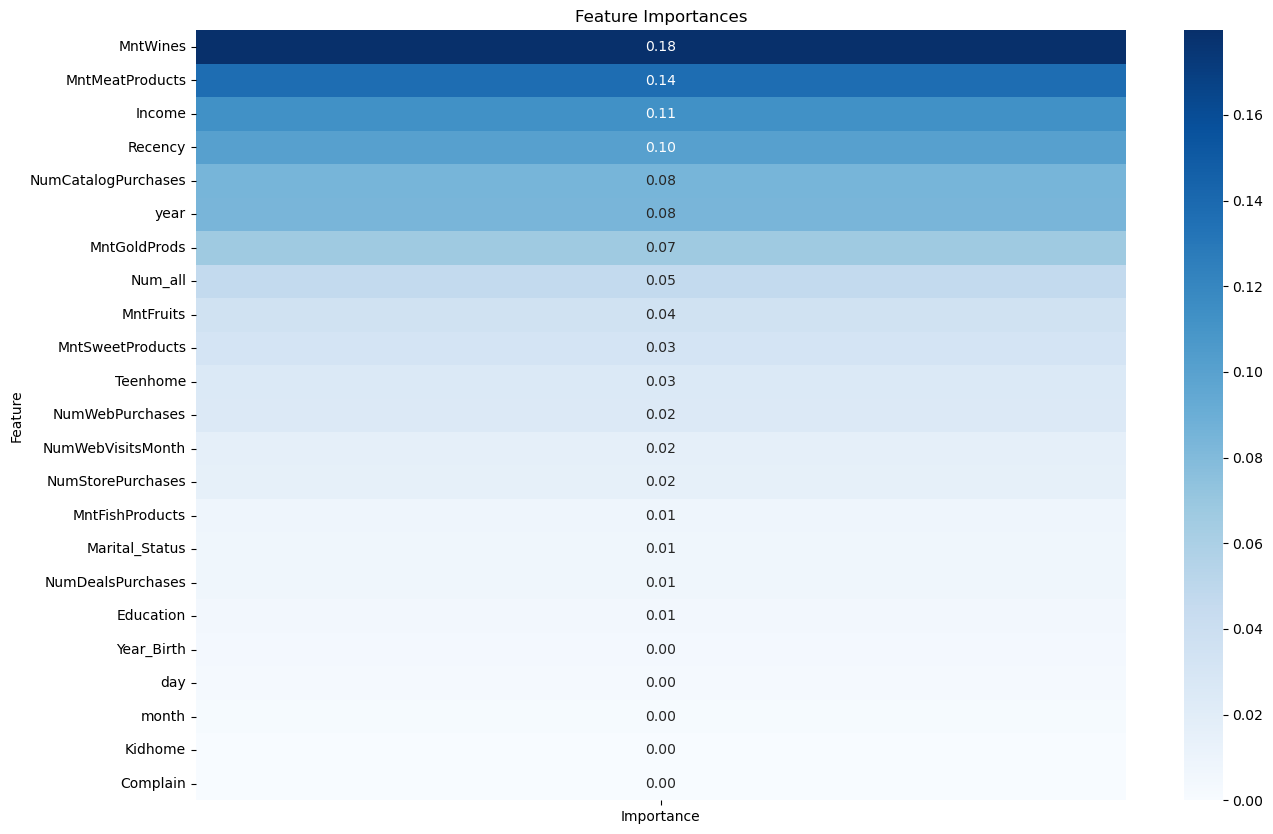

In [24]:
# Define the model
clf = RandomForestClassifier(max_depth=2, random_state=42)

# Define k-fold cross-validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)

# Perform cross-validation and calculate f1-scores
f1_scores = cross_val_score(clf, project_df[features], project_df[classification_target], cv=kf, scoring='f1_macro')

# Print the mean and standard deviation of f1-scores
print('Mean f1-score:', f1_scores.mean())
print('Standard deviation of f1-score:', f1_scores.std())

# Fit the model on the whole dataset and extract feature importances
clf.fit(project_df[features], project_df[classification_target])
importances = clf.feature_importances_

# Create a DataFrame with feature importances
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the features by importance
importances_df = importances_df.sort_values('Importance', ascending=False)

# Create a heatmap of feature importances
plt.figure(figsize=(15, 10))
sns.heatmap(importances_df.set_index('Feature'), cmap='Blues', annot=True, fmt='.2f')
plt.title('Feature Importances')
plt.show()

<AxesSubplot:>

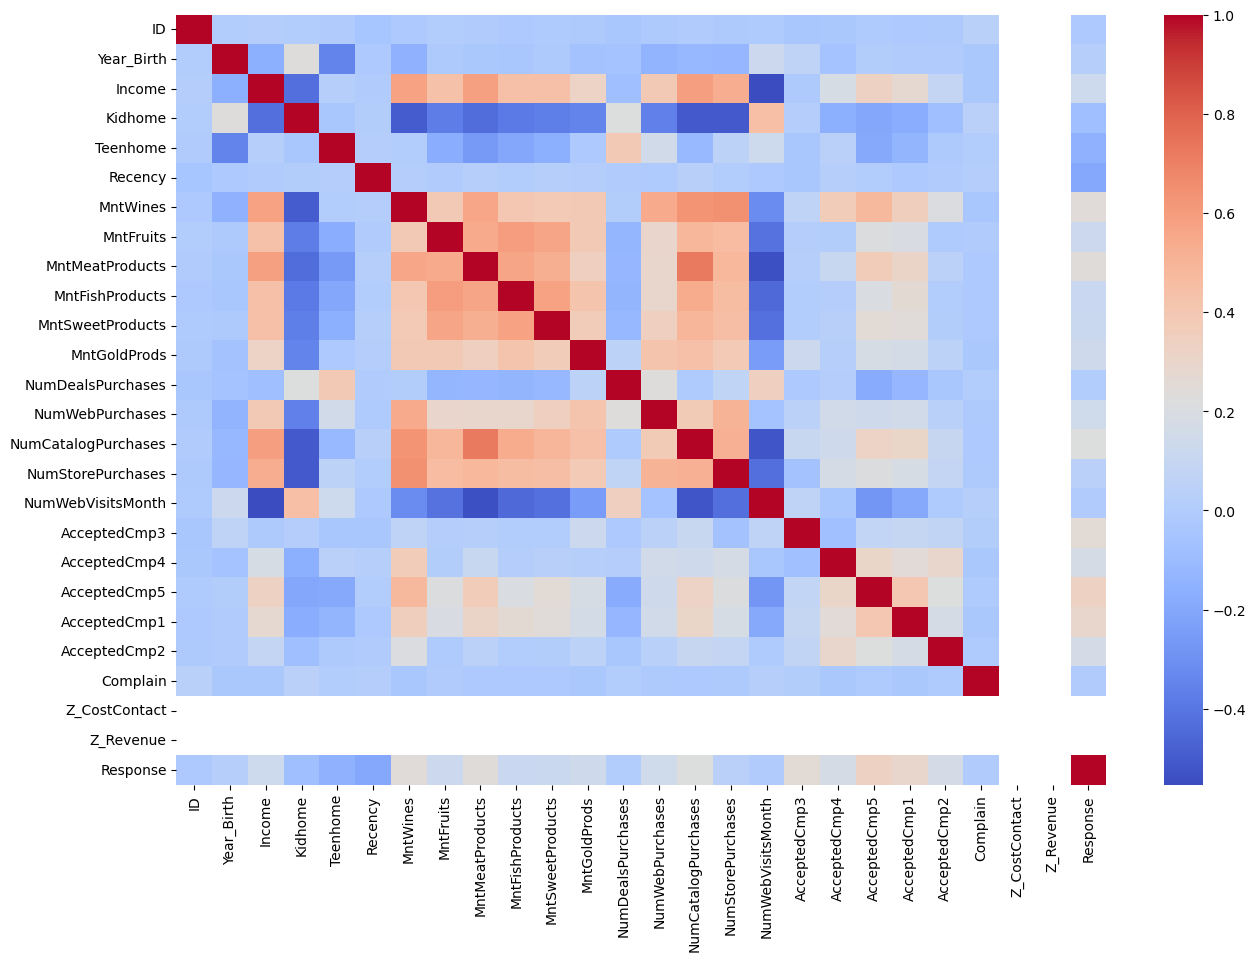

In [25]:
# 데이터 불러오기
data = pd.read_csv('./ml_project1_data.csv')

# heatmap 그리기
fig, ax2 = plt.subplots(figsize=(15, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm', ax=ax2)


#cool 계열은 파란색 계열로 낮은 값을, warm 계열은 붉은색 계열로 높은 값

### Regression

#### First

In [26]:
X_train, X_test, y_train, y_test = train_test_split(project_df[features], project_df[regression_target],
                                                    test_size=0.2, random_state=42,
                                                    stratify = project_df[classification_target])

regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)
regr.predict(X_test)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3772058761.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

array([ 1.21472660e+00, -4.30886087e-01, -8.14188709e-01, -7.56899643e-02,
        5.77662329e-01, -8.14188709e-01, -8.14188709e-01, -8.14188709e-01,
       -8.14188709e-01, -7.12363805e-01,  7.29838789e-01, -7.12363805e-01,
       -8.14188709e-01, -6.97122164e-01,  2.22061951e-01, -8.14188709e-01,
       -8.14188709e-01, -4.08314800e-02, -8.14188709e-01, -8.14188709e-01,
        2.02457698e-01, -7.65602650e-01,  6.67308426e-01, -8.14188709e-01,
       -6.51768237e-02,  1.06678468e+00,  7.19232329e-01,  4.50499548e-01,
       -8.14188709e-01,  7.45538138e-01, -8.14188709e-01,  2.02457698e-01,
        1.40492441e+00, -8.14188709e-01,  6.73677370e-01,  1.40492441e+00,
        1.09149099e+00,  1.09149099e+00, -8.14188709e-01,  1.00544816e+00,
        5.46544570e-01, -7.04423844e-01,  5.70910179e-01, -8.14188709e-01,
        3.50216584e-01, -8.14188709e-01, -8.14188709e-01, -8.14188709e-01,
       -7.86034150e-01,  1.61420286e+00, -7.78094189e-01, -8.14188709e-01,
       -8.14188709e-01, -

In [27]:
plt.rc("font", family="Malgun Gothic")

In [28]:
features = [
 'Year_Birth',
 'Education',
 'Marital_Status', 'Income', 'Kidhome', 
 'Teenhome', 'Recency', 
 'MntWines', 'MntMeatProducts',
 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumDealsPurchases', 'NumWebPurchases',
 'NumCatalogPurchases', 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
 'Complain', 'Accept_all', 
 'year', 'month','day', 
 'Num_all'
           ]

regression_target = ['Mnt_all']

'\nX_train, X_test, y_train, y_test = train_test_split(project_df[features], project_df[regression_target],\n                                                    test_size=0.2, random_state=42,\n                                                    stratify = project_df[classification_target])\n\nregr = RandomForestRegressor(max_depth=2, random_state=42)\nregr.fit(X_train, y_train)\nregr.predict(X_test)\n\n'

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\3416336746.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

mean: 0.1138012047437501
std: 0.012728325993995857
중요 순위:
1 MntMeatProducts 0.5469652227103856
2 MntWines 0.4032666635801355
3 NumCatalogPurchases 0.04897464272570234
4 NumStorePurchases 0.0007934709837764622
5 Num_all 0.0
6 MntGoldProds 0.0
7 Education 0.0
8 Marital_Status 0.0
9 Income 0.0
10 Kidhome 0.0
11 Teenhome 0.0
12 Recency 0.0
13 MntFruits 0.0
14 MntFishProducts 0.0
15 MntSweetProducts 0.0
16 NumWebPurchases 0.0
17 NumDealsPurchases 0.0
18 day 0.0
19 NumWebVisitsMonth 0.0
20 AcceptedCmp3 0.0
21 AcceptedCmp4 0.0
22 AcceptedCmp5 0.0
23 AcceptedCmp1 0.0
24 AcceptedCmp2 0.0
25 Complain 0.0
26 Accept_all 0.0
27 year 0.0
28 month 0.0
29 Year_Birth 0.0


<AxesSubplot:>

Text(0.5, 0, '상대적 중요도')

Text(0, 0.5, '피쳐')

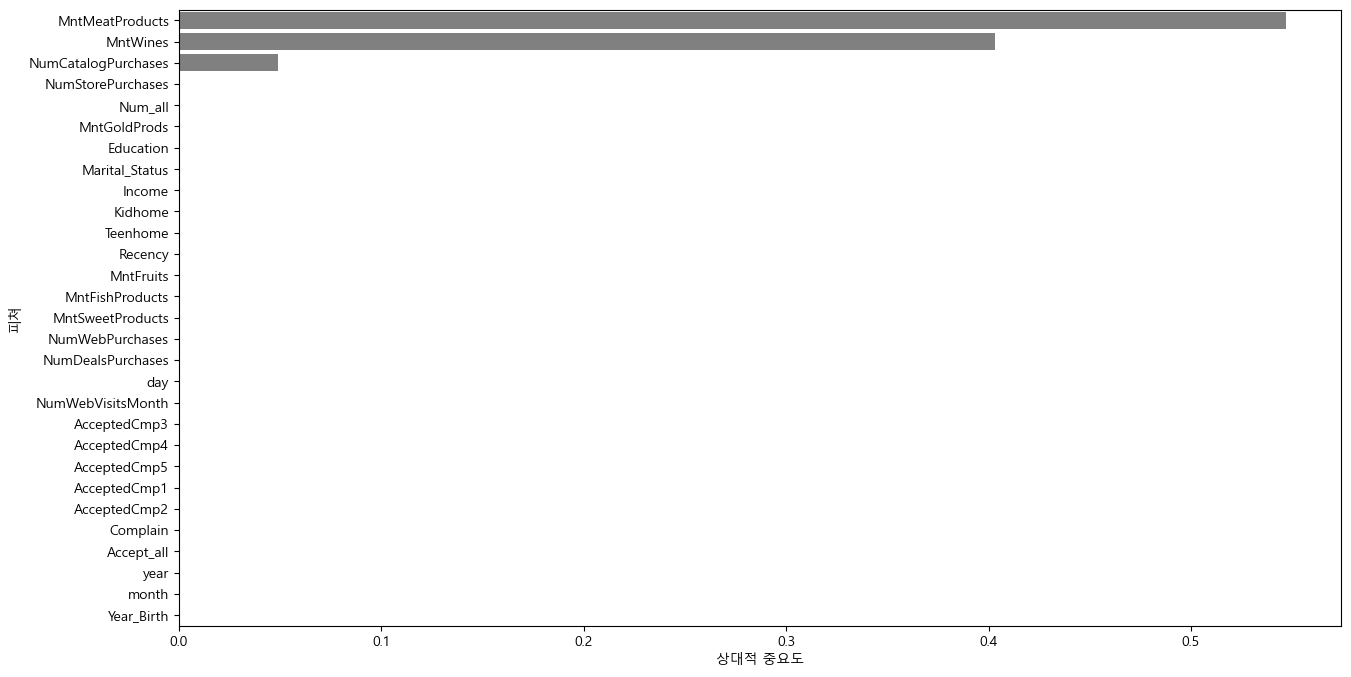

C:\Users\jihoo\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\jihoo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


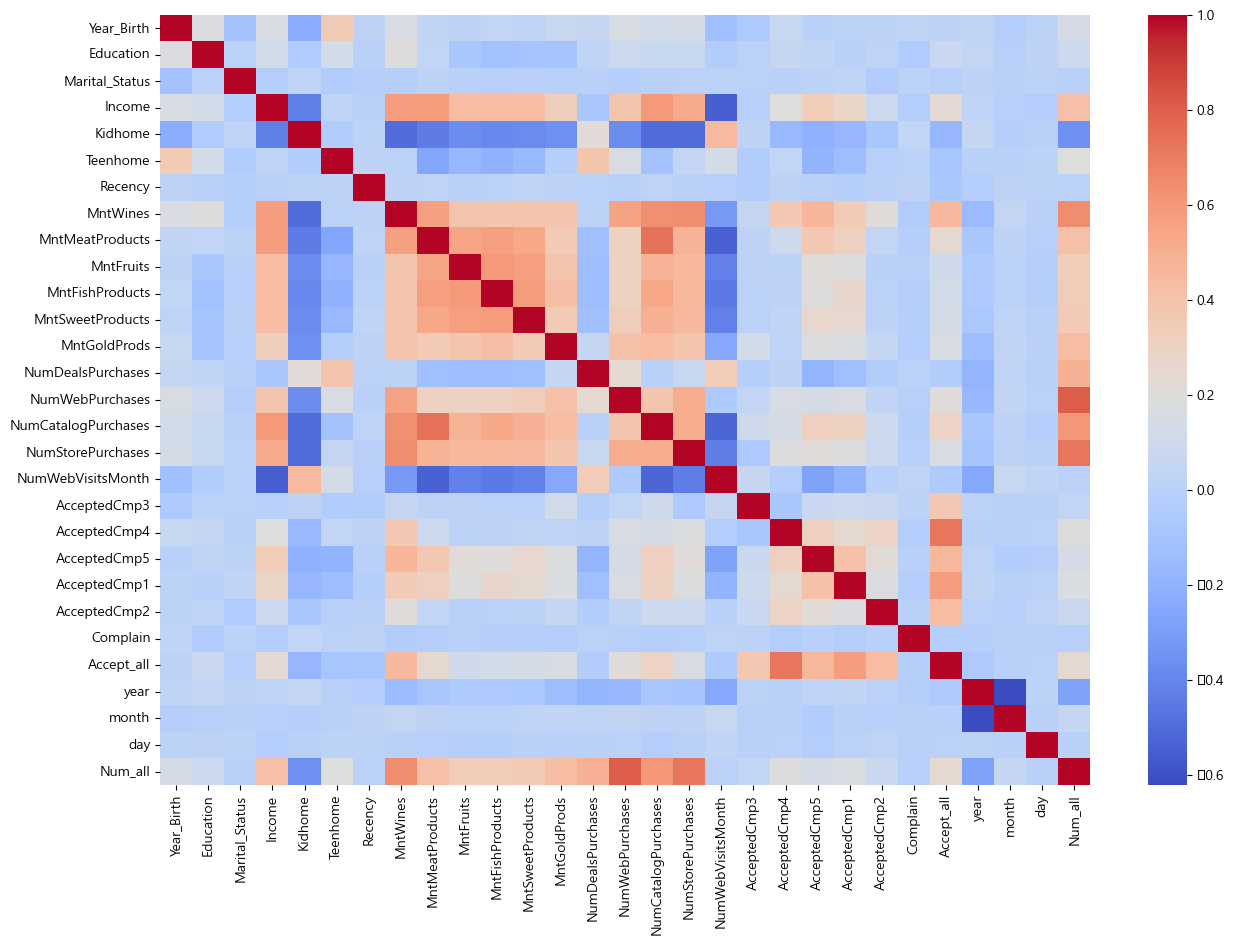

In [29]:
# 10fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

regr = RandomForestRegressor(max_depth=2, random_state=42)

mse_list = []

'''
X_train, X_test, y_train, y_test = train_test_split(project_df[features], project_df[regression_target],
                                                    test_size=0.2, random_state=42,
                                                    stratify = project_df[classification_target])

regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)
regr.predict(X_test)

'''
# 폴드마다 forloop
for train_index, test_index in kf.split(project_df[features], project_df[regression_target]):

    # 
    X_train, X_test = project_df[features].iloc[train_index], project_df[features].iloc[test_index]
    y_train, y_test = project_df[regression_target].iloc[train_index], project_df[regression_target].iloc[test_index]
    
    regr.fit(X_train, y_train)
    
    # 예측 및 mse 계산
    y_predict = regr.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    mse_list.append(mse)

# mse들 mean과 std
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)

print("mean:", mse_mean)
print("std:", mse_std)

# featrue importance 뽑기
importance = regr.feature_importances_

# 정렬 인덱스
index = np.argsort(importance)[::-1]

# 순위와 값
print("중요 순위:")
for i in range(len(features)):
    print(i + 1, features[index[i]], importance[index[i]])

# 중요도 그림
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=importance[index], y=np.array(features)[index], color='gray')
plt.xlabel("상대적 중요도")
plt.ylabel("피쳐")
plt.show()

# 히트맵
fig, ax2 = plt.subplots(figsize=(15, 10))
sns.heatmap(project_df[features].corr(), annot=False, cmap="coolwarm", ax=ax2)
plt.show()


#### Second

Mnt에 관련된 모든 변수들 제외하고 재모델링후 중요변수 추출

In [30]:
features = [
 'Year_Birth',
 'Education',
 'Marital_Status', 'Income', 'Kidhome', 
 'Teenhome', 'Recency', 
# 'MntWines', 'MntMeatProducts',
# 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
 'NumDealsPurchases', 'NumWebPurchases',
 'NumCatalogPurchases', 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 
 'Complain', 'Accept_all', 
 'year', 'month','day', 
 'Num_all'
           ]

regression_target = ['Mnt_all']

'\nX_train, X_test, y_train, y_test = train_test_split(project_df[features], project_df[regression_target],\n                                                    test_size=0.2, random_state=42,\n                                                    stratify = project_df[classification_target])\n\nregr = RandomForestRegressor(max_depth=2, random_state=42)\nregr.fit(X_train, y_train)\nregr.predict(X_test)\n\n'

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\2375164587.py:23: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X_train, y_train)


RandomForestRegressor(max_depth=2, random_state=42)

mean: 0.20893888314267825
std: 0.034242665665311325
중요 순위:
1 NumCatalogPurchases 0.6454030025315369
2 Income 0.2582545009154161
3 NumStorePurchases 0.06979072746509322
4 Num_all 0.023905427484648942
5 Teenhome 0.0020360911879538485
6 AcceptedCmp5 0.0006102504153510218
7 Education 0.0
8 Marital_Status 0.0
9 Kidhome 0.0
10 Recency 0.0
11 NumDealsPurchases 0.0
12 NumWebPurchases 0.0
13 NumWebVisitsMonth 0.0
14 day 0.0
15 AcceptedCmp3 0.0
16 AcceptedCmp4 0.0
17 AcceptedCmp1 0.0
18 AcceptedCmp2 0.0
19 Complain 0.0
20 Accept_all 0.0
21 year 0.0
22 month 0.0
23 Year_Birth 0.0


<AxesSubplot:>

Text(0.5, 0, '상대적 중요도')

Text(0, 0.5, '피쳐')

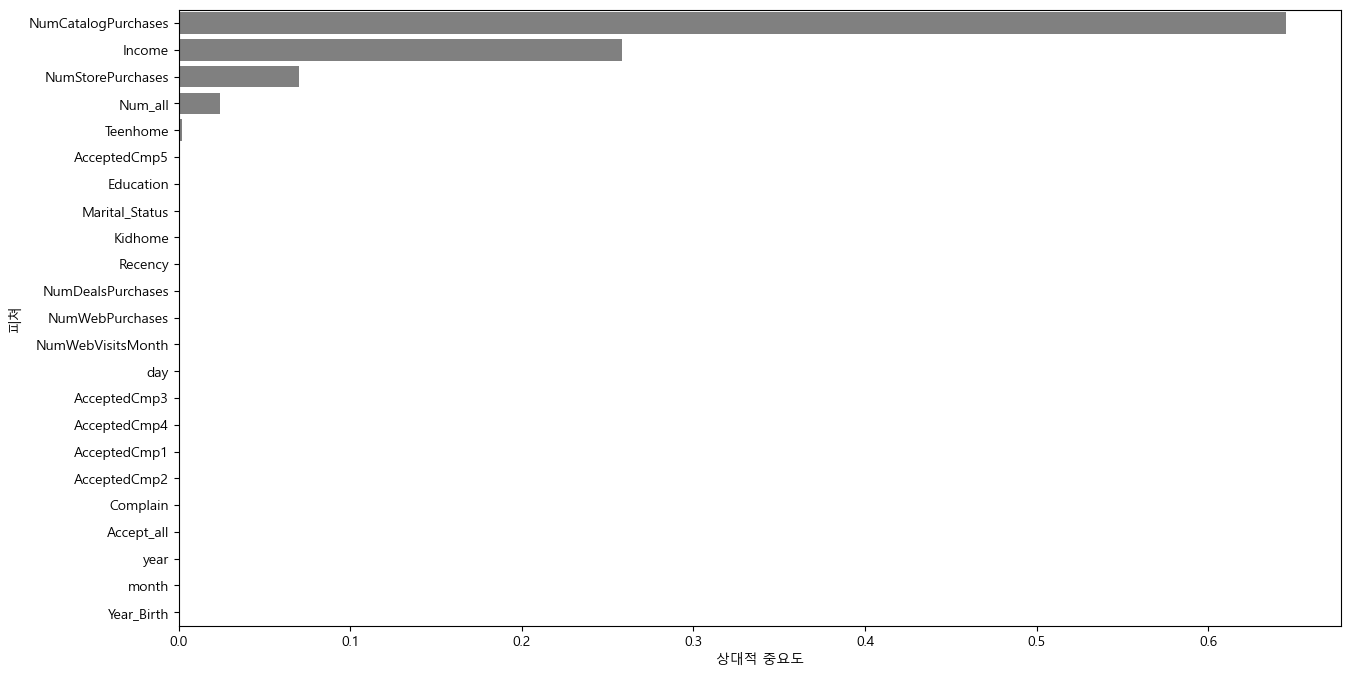

C:\Users\jihoo\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\jihoo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


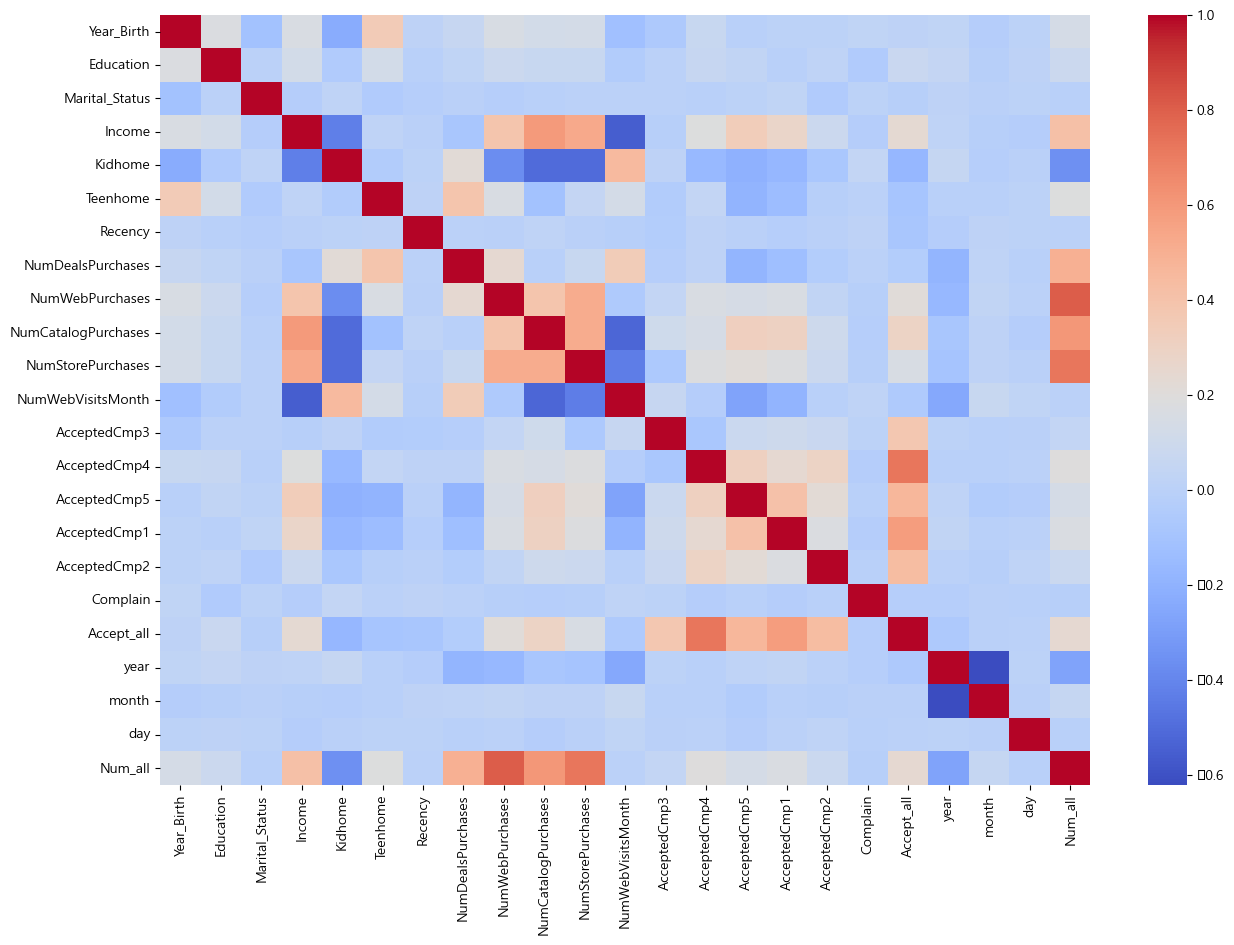

In [31]:
# 10fold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

regr = RandomForestRegressor(max_depth=2, random_state=42)

mse_list = []

'''
X_train, X_test, y_train, y_test = train_test_split(project_df[features], project_df[regression_target],
                                                    test_size=0.2, random_state=42,
                                                    stratify = project_df[classification_target])

regr = RandomForestRegressor(max_depth=2, random_state=42)
regr.fit(X_train, y_train)
regr.predict(X_test)

'''
# 폴드마다 forloop
for train_index, test_index in kf.split(project_df[features], project_df[regression_target]):

    X_train, X_test = project_df[features].iloc[train_index], project_df[features].iloc[test_index]
    y_train, y_test = project_df[regression_target].iloc[train_index], project_df[regression_target].iloc[test_index]
    regr.fit(X_train, y_train)
    
    y_predict = regr.predict(X_test)
    mse = mean_squared_error(y_test, y_predict)
    mse_list.append(mse)

# mse들 mean과 std
mse_mean = np.mean(mse_list)
mse_std = np.std(mse_list)

print("mean:", mse_mean)
print("std:", mse_std)

# featrue importance 뽑기
importance = regr.feature_importances_

# 정렬 인덱스
index = np.argsort(importance)[::-1]

# 순위와 값
print("중요 순위:")
for i in range(len(features)):
    print(i + 1, features[index[i]], importance[index[i]])

# 중요도 그림
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(x=importance[index], y=np.array(features)[index], color='gray')
plt.xlabel("상대적 중요도")
plt.ylabel("피쳐")
plt.show()

# 히트맵
fig, ax2 = plt.subplots(figsize=(15, 10))
sns.heatmap(project_df[features].corr(), annot=False, cmap="coolwarm", ax=ax2)
plt.show()


# Customer Segmentation

In [32]:
features_try1 = [ 'Accept_all','AcceptedCmp5', 'AcceptedCmp1', 'MntWines', 'MntMeatProducts']
features_try2 = ['Income', 'MntWines','NumCatalogPurchases']

features_try1.extend(features_try2)
features_1and2 = set(features_try1)
features_1and2

{'Accept_all',
 'AcceptedCmp1',
 'AcceptedCmp5',
 'Income',
 'MntMeatProducts',
 'MntWines',
 'NumCatalogPurchases'}

In [33]:
project_df1_cl = project_df[features_1and2]
project_df1_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Accept_all           2216 non-null   int64  
 1   AcceptedCmp1         2216 non-null   int64  
 2   MntMeatProducts      2216 non-null   float64
 3   NumCatalogPurchases  2216 non-null   float64
 4   Income               2216 non-null   float64
 5   MntWines             2216 non-null   float64
 6   AcceptedCmp5         2216 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 121.3 KB


C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\225618791.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  project_df1_cl = project_df[features_1and2]


## Clustering

### Elbow graph for Kmeans

C:\Users\jihoo\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


Text(0.5, 0, 'k')

Text(0, 0.5, 'sum of squared distance')

Text(0.5, 1.0, 'Elbow Method for getting k value')

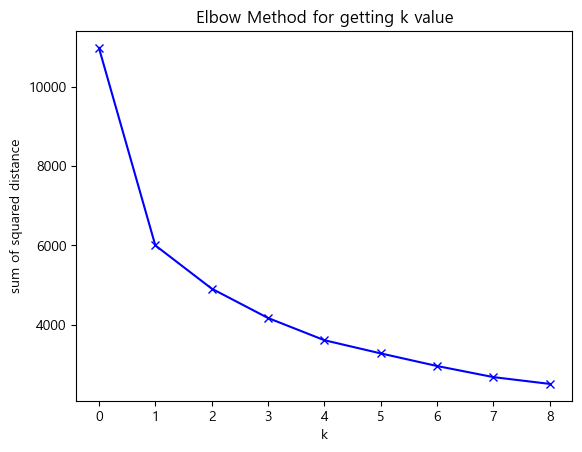

In [67]:
from sklearn.cluster import KMeans              # KMeans 라이브러리를 불러온다.

sum_of_squared_distance = []                    # k의 개수를 구하기 위한 엘보우 메소드의 요소를 넣을 list 변수 생성
K = range(1,10)                                 # 9개만 구해본다.
for k in K:                                     # 1부터 9까지의 for문 반복을 통해 각 Kmeans의 군집을 몇개까지 하면 될지 측정한다.
    km = KMeans(n_clusters = k)                   # KMeans 함수의 설정 - n_clusters = 군집의 개수(정확히는 군집의 centroid 개수이다)
    km = km.fit(project_df1_cl)                             # 해당 군집중앙의 개수를 정규화(표준화) 해놓은 project_df_cl data에 적용
    sum_of_squared_distance.append(km.inertia_)   # inertia_함수를 이용해 군집간 거리가 최소가 되는 k를 누적하여 파악한다.




plt.plot(sum_of_squared_distance, '-bx')        # (default = line) plot을 그리고, 컬러를 blue, 포인터를 x로 놓는다. 
plt.xlabel('k')                                 # x축은 k로 지정
plt.ylabel('sum of squared distance')           # y축엔 거리제곱합의 이름
plt.title('Elbow Method for getting k value')   # 제목도 변경한다.
plt.show()    

### Kmeans

In [68]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100,
                tol=0.001, verbose=0, algorithm='elkan')
kmeans.fit(project_df1_cl)
label = kmeans.labels_
label = pd.Series(label)


KMeans(algorithm='elkan', n_clusters=3, n_init=100, random_state=42, tol=0.001)

In [70]:
label

0       0
1       1
2       0
3       1
4       1
       ..
2211    0
2212    1
2213    2
2214    0
2215    1
Length: 2216, dtype: int32

### PCA for visualization

In [71]:
pca = PCA(n_components = 2)           # 2차원으로 시각화를 진행할 것이므로 2개로 설정한다.
pca.fit(project_df1_cl)             
df_p = pca.transform(project_df1_cl)
df_p = pd.DataFrame(df_p, columns = ['PC1','PC2']) #PCA진행 한 두 개의 값을 column으로 데이터프레임화 시킨다.
df_p

PCA(n_components=2)

,PC1,PC2
0,2.780262,0.357498
1,-1.284556,0.229824
2,0.201287,0.388300
3,-1.783199,0.004842
4,-0.251685,0.505551
...,...,...
2211,0.707639,0.232640
2212,0.138986,-0.768603
2213,1.495880,-1.621966
2214,0.861780,0.683887


In [72]:
df_p['label'] = label.values
df_p

,PC1,PC2,label
0,2.780262,0.357498,0
1,-1.284556,0.229824,1
2,0.201287,0.388300,0
3,-1.783199,0.004842,1
4,-0.251685,0.505551,1
...,...,...,...
2211,0.707639,0.232640,0
2212,0.138986,-0.768603,1
2213,1.495880,-1.621966,2
2214,0.861780,0.683887,0


Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

C:\Users\jihoo\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


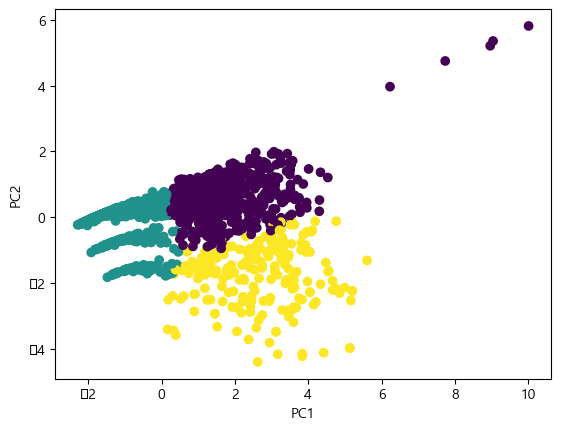

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(df_p['PC1'], df_p['PC2'], c=df_p['label'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [74]:
project_df['label'] = df_p['label']
project_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,5,0.234063,0,0,2012-09-04,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,2174,1.236801,2,5,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
2,4141,0.318822,2,2,0.769478,0,0,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0,2013,8,21,0.280250,0.659213,0
3,6182,-1.266777,2,2,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
4,5324,-1.016420,4,7,0.240221,1,0,2014-01-19,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,0,2014,1,19,-0.307044,0.521879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870,0.151917,2,7,0.356642,0,1,2013-06-13,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,0,0,0,0,0,0,0,0,2013,6,13,1.217598,0.384546,0
2212,4001,1.904422,4,2,0.467539,2,1,2014-06-10,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,0,0,0,1,0,0,0,1,2014,6,10,-0.270546,1.208546,1
2213,7270,-1.016420,2,0,0.188091,0,0,2014-01-25,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,0,1,0,0,0,0,0,2,2014,1,25,1.051696,0.659213,2
2214,8235,1.069896,3,2,0.675388,0,1,2014-01-24,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,0,0,0,0,0,0,0,0,2014,1,24,0.391404,0.796546,0


In [39]:
# project_df.to_csv('../with_cluster_df2.csv')

# Analysis Per Segment

In [4]:
data = pd.read_csv('./with_cluster_df2.csv', index_col=0) # 클러스터링후의 데이터 
raw = pd.read_csv('./no_scaling_with_label.csv', index_col=0)

data.head()
raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
2,4141,0.318822,2,3,0.769478,0,0,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0,2013,8,21,0.280250,0.659213,0
3,6182,-1.266777,2,3,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
4,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,0,2014,1,19,-0.307044,0.521879,1


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1


고객층
- 고객층 label 0 : 646명 - 직접고객
- 고객층 label 1 : 1355명 - 잠재고객
- 고객층 label 2 : 215명 - 충성고객

In [5]:
## 라벨별 데이터프레임 지정
labels = set(data['label'])

for label in labels :
    globals()['df{}'.format(label)] = data[data['label'] == label].reset_index(drop=True)

In [6]:
## 라벨별 데이터프레임 지정
labels = set(data['label'])

for label in labels :
    globals()['raw{}'.format(label)] = raw[raw['label'] == label].reset_index(drop=True)

In [7]:
df0

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,5524,0.986443,2,4,0.234063,0,0,2012-09-04,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,0,0,0,0,0,0,1,1,2012,9,4,1.675488,1.620547,0
1,4141,0.318822,2,3,0.769478,0,0,2013-08-21,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0,0,0,0,0,0,0,0,2013,8,21,0.280250,0.659213,0
2,7446,0.151917,3,3,0.407899,0,1,2013-09-09,-1.140655,0.637234,0.393213,-0.307698,-0.687574,0.364591,-0.578438,-0.168231,0.698715,0.454182,1.291982,0.280829,0,0,0,0,0,0,0,0,2013,9,9,0.180708,1.071213,0
3,2125,0.819538,2,6,0.428560,0,0,2013-11-15,1.139782,-0.329403,0.870781,1.395890,3.422786,2.069298,-0.269580,-0.688176,-0.396043,0.454182,0.676607,-1.368784,0,0,0,0,0,0,0,0,2013,11,15,0.821091,-0.302121,0
4,6565,1.654064,3,0,0.983326,0,1,2013-03-28,1.450751,2.096085,1.348348,1.476163,-0.687574,-0.268586,2.548750,-0.168231,2.523311,0.454182,0.984294,-0.131574,0,0,0,1,0,0,0,1,2013,3,28,1.949227,1.483213,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4286,-0.098441,4,4,0.214355,0,1,2014-01-09,-0.864239,0.815143,-0.511652,-0.486084,-0.541428,-0.658233,-0.327491,0.351713,1.063634,1.137692,0.061232,-0.543978,1,0,0,0,0,0,0,1,2014,1,9,0.119325,0.796546,0
642,9817,-0.098441,3,4,-0.295829,0,0,2012-08-21,0.759709,1.624627,-0.411112,-0.107014,-0.450087,-0.414704,-0.462616,-0.168231,1.793473,0.454182,1.907357,1.105635,0,0,0,0,0,0,0,0,2012,8,21,0.733163,2.032547,0
643,9432,-0.682609,2,3,24.413282,1,0,2013-06-02,-0.898791,-0.877954,-0.310571,-0.664470,-0.541428,-0.633880,-0.617045,0.871658,-0.396043,-0.571082,-0.861830,0.280829,0,0,0,0,0,0,0,0,2013,6,2,-0.904293,-0.439455,0
644,10870,0.151917,2,0,0.356642,0,1,2013-06-13,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,0,0,0,0,0,0,0,0,2013,6,13,1.217598,0.384546,0


In [8]:
df1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,2174,1.236801,2,4,-0.234559,1,1,2014-03-08,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,0,0,0,0,0,0,0,0,2014,3,8,-0.962358,-1.263455,1
1,6182,-1.266777,2,3,-1.017239,1,0,2014-02-10,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,0,0,0,0,0,0,0,0,2014,2,10,-0.919224,-0.851455,1
2,5324,-1.016420,4,0,0.240221,1,0,2014-01-19,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,0,0,0,0,0,0,0,0,2014,1,19,-0.307044,0.521879,1
3,965,-0.181894,2,6,0.134609,0,1,2012-11-13,-0.518718,-0.207832,0.971321,-0.013361,0.225839,0.535062,-0.327491,0.871658,1.063634,0.112428,0.368919,0.280829,0,0,0,0,0,0,0,0,2012,11,13,-0.028328,0.933880,1
4,6177,-1.350230,4,0,-0.746730,1,0,2013-05-08,-0.587822,-0.679290,-0.411112,-0.495003,-0.632770,-0.633880,-0.404706,-0.168231,-0.031124,-0.912837,-0.554143,1.105635,0,0,0,0,0,0,0,0,2013,5,8,-0.726777,-0.302121,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,7004,-1.266777,2,4,-1.638439,1,0,2013-03-16,1.139782,-0.833477,-0.587058,-0.628793,-0.559697,-0.633880,-0.404706,0.351713,-0.396043,-0.571082,-1.169518,1.518038,1,0,0,0,0,0,0,1,2013,3,16,-0.867794,-0.302121,1
1351,8080,-1.433683,2,4,-1.010484,0,0,2012-08-17,0.034115,-0.889815,-0.637328,-0.717986,-0.632770,-0.560821,-0.790778,-0.688176,-1.490800,-0.912837,-0.861830,-0.543978,0,0,0,0,0,0,0,0,2012,8,17,-0.970653,-1.675455,1
1352,8372,-0.432251,2,0,-0.708307,1,0,2013-07-01,1.105230,-0.895745,-0.587058,-0.713526,-0.577965,-0.609527,-0.674956,-0.688176,-1.125881,-0.912837,-1.169518,0.693232,0,0,0,0,0,0,0,0,2013,7,1,-0.957381,-1.263455,1
1353,4001,1.904422,4,3,0.467539,2,1,2014-06-10,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,0,0,0,1,0,0,0,1,2014,6,10,-0.270546,1.208546,1


In [9]:
df2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Accept_all,year,month,day,Mnt_all,Num_all,label
0,2114,1.904422,4,4,1.213981,0,0,2012-11-24,-0.898791,2.078294,-0.109490,-0.231884,0.390253,0.997768,0.019974,-0.688176,1.063634,1.137692,1.907357,-0.956381,0,0,1,1,0,0,1,2,2012,11,24,1.174463,1.208546,2
1,1993,1.654064,4,0,0.252698,0,1,2012-12-23,0.483293,1.666139,-0.662463,-0.361214,-0.687574,-0.658233,-0.481920,0.351713,-0.760962,0.112428,0.984294,1.105635,0,1,0,0,0,0,0,2,2012,12,23,0.605418,0.659213,2
2,2968,2.154779,4,6,-0.131092,0,0,2013-02-01,0.137772,0.391127,-0.461382,0.173945,2.235348,0.535062,-0.037937,-0.168231,1.063634,2.504712,-0.246455,0.280829,1,0,0,0,0,0,1,2,2013,2,1,0.489287,1.345880,2
3,2225,-0.682609,2,6,1.205319,0,0,2014-06-07,0.172324,0.607583,2.353754,1.708065,2.162275,0.315885,3.803486,-0.688176,-0.031124,2.162957,0.368919,-1.781187,1,0,0,1,0,0,1,3,2014,6,7,1.675488,0.247213,2
4,6853,-1.099872,3,4,0.934930,0,0,2013-07-04,-1.278863,1.206542,-0.008949,1.654550,0.572936,-0.341645,0.695602,-0.688176,-0.396043,1.137692,1.599669,-1.781187,0,1,1,0,0,0,1,3,2013,7,4,1.378523,0.247213,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2666,-0.265346,3,0,0.953088,0,1,2014-02-06,-0.967895,0.634269,0.594294,0.000018,1.687300,-0.658233,-0.057240,-0.688176,1.428553,0.112428,1.599669,-0.956381,0,1,0,0,0,0,0,2,2014,2,6,0.497582,0.796546,2
211,8722,0.986443,0,0,1.195982,0,0,2012-11-06,-0.380509,0.743979,0.694835,3.023663,3.002616,2.580710,0.367440,-0.688176,1.063634,1.479447,1.291982,-0.956381,1,0,0,1,0,0,1,3,2012,11,6,2.067018,1.071213,2
212,7118,0.986443,2,0,0.856495,0,1,2012-08-01,0.414188,1.565324,1.348348,0.874110,0.262376,-0.025056,2.510143,-0.168231,1.793473,0.795937,0.061232,0.280829,1,0,0,0,0,0,1,2,2012,8,1,1.527835,1.071213,2
213,7366,-1.099872,3,4,0.934930,0,0,2013-07-04,-1.278863,1.206542,-0.008949,1.654550,0.572936,-0.341645,0.695602,-0.688176,-0.396043,1.137692,1.599669,-1.781187,0,1,1,0,0,0,1,3,2013,7,4,1.378523,0.247213,2


In [10]:
raw0

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,0
1,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,0
2,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,0
3,2125,1959,Graduation,Divorced,63033.0,0,0,2013-11-15,82,194,61,480,225,112,30,1,3,4,8,2,0,0,0,0,0,0,0,0
4,6565,1949,Master,Married,76995.0,0,1,2013-03-28,91,1012,80,498,0,16,176,2,11,4,9,5,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641,4286,1970,PhD,Single,57642.0,0,1,2014-01-09,24,580,6,58,8,0,27,3,7,6,6,4,1,0,0,0,0,0,0,0
642,9817,1970,Master,Single,44802.0,0,0,2012-08-21,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,0,0
643,9432,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,0,0
644,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,0


In [11]:
raw1

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,1
1,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,1
2,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,1
3,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,1
4,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,7004,1984,Graduation,Single,11012.0,1,0,2013-03-16,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,0,1
1351,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,0,1
1352,8372,1974,Graduation,Married,34421.0,1,0,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0,1
1353,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,1


In [12]:
raw2

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,label
0,2114,1946,PhD,Single,82800.0,0,0,2012-11-24,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,1,2
1,1993,1949,PhD,Married,58607.0,0,1,2012-12-23,63,867,0,86,0,0,19,3,2,3,9,8,0,1,0,0,0,0,0,2
2,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,1,2
3,2225,1977,Graduation,Divorced,82582.0,0,0,2014-06-07,54,510,120,550,156,40,241,1,4,9,7,1,1,0,0,1,0,0,1,2
4,6853,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2666,1972,Master,Married,76234.0,0,1,2014-02-06,21,519,50,167,130,0,41,1,8,3,11,3,0,1,0,0,0,0,0,2
211,8722,1957,2n Cycle,Married,82347.0,0,0,2012-11-06,38,556,54,845,202,133,63,1,7,7,10,3,1,0,0,1,0,0,1,2
212,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,80,363,52,26,174,2,9,5,6,6,1,0,0,0,0,0,1,2
213,7366,1982,Master,Single,75777.0,0,0,2013-07-04,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,1,2


## 아이와 Teen 비교

고객1 집단이 다른 집단에 비해서 아이와 청소년과 같이 산다.

In [49]:
fea_li = ['Kidhome', 'Teenhome']
label = ['label']


## 색 지정

In [14]:
r=sns.color_palette('pastel')[0]
wb=sns.color_palette('pastel')[7]
p=sns.color_palette('pastel')[1]


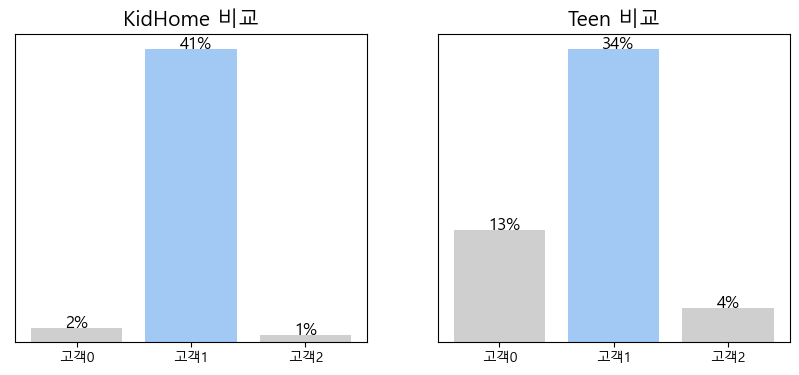

In [51]:
fig = plt.figure(figsize=(10,4))
axs = fig.subplots(1,2)

##############axs[0] : kidhome ###############
X = [0,1,2]
color = [wb,r,wb]
Y = [raw0['Kidhome'].sum(), raw1['Kidhome'].sum(), raw2['Kidhome'].sum()]
Y = [round(y/2216*100) for y in Y]
_=axs[0].bar(X,Y, color=color)
_=axs[0].set_xticks(X)
_=axs[0].set_xticklabels(['고객0', '고객1', '고객2'])
_=axs[0].set_ylim()
for x in X :
    _=axs[0].text(x-0.1, Y[x],'{}%'.format(Y[x]),
               fontsize=12)
_=axs[0].set_title('KidHome 비교', fontsize=15)
_=axs[0].axes.yaxis.set_visible(False)

##############axs[0] : Teen ###############

X = [0,1,2]
color = [wb,r,wb]
Y = [raw0['Teenhome'].sum(), raw1['Teenhome'].sum(), raw2['Teenhome'].sum()]
Y = [round(y/2216*100) for y in Y]
_=axs[1].bar(X,Y, color=color)
_=axs[1].set_xticks(X)
_=axs[1].set_xticklabels(['고객0', '고객1', '고객2'])
_=axs[1].set_ylim()

for x in X :
    _=axs[1].text(x-0.1, Y[x],'{}%'.format(Y[x]),
               fontsize=12)
_=axs[1].set_title('Teen 비교', fontsize=15)
_=axs[1].axes.yaxis.set_visible(False)







## Wine비교

### 상품별 비교

wine상품이 가장 잘 팔린다

In [52]:
raw[['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
sr2=raw[['MntWines', 'MntMeatProducts', 'MntFruits', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
sr2=sr2.sort_values(ascending=False)
sr2

,MntWines,MntMeatProducts,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,546,88,172,88,88
1,11,6,1,2,1,6
2,426,127,49,111,21,42
3,11,20,4,10,3,5
4,173,118,43,46,27,15
...,...,...,...,...,...,...
2211,709,182,43,42,118,247
2212,406,30,0,0,0,8
2213,908,217,48,32,12,24
2214,428,214,30,80,30,61


MntWines            676083
MntMeatProducts     370063
MntGoldProds         97427
MntFishProducts      83405
MntSweetProducts     59896
MntFruits            58405
dtype: int64

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\1803342166.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  _=ax.set_xticklabels(['와인', '고기', '금', '생선', '스위츠', '과일'],


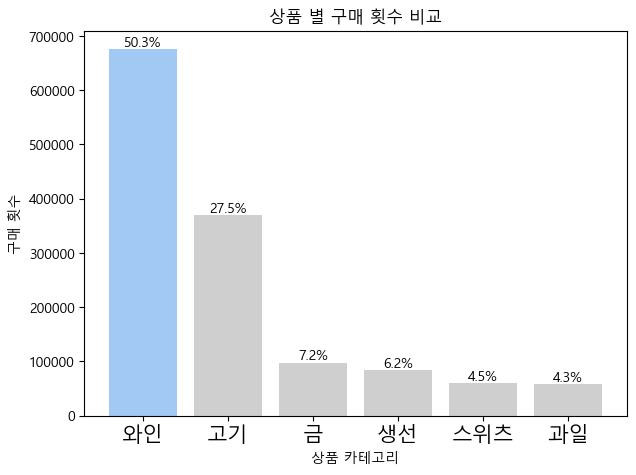

In [53]:
# 상품 별로 value를 count해서 barplot 하였습니다.

# 도화지
fig=plt.figure(figsize=(7,5))
ax=fig.subplots(1,1)


# 색 리스트
colors = [r,wb,wb,wb,wb,wb]


# bar 그리기
bar=ax.bar(data=sr2, x=sr2.index, height=sr2.values, color=colors)


# x 라벨
_=ax.set_xticklabels(['와인', '고기', '금', '생선', '스위츠', '과일'],
                      fontsize=15)


# x,y 제목
_=ax.set_xlabel('상품 카테고리')
_=ax.set_ylabel('구매 횟수')


# bar에 숫자 넣기
for rect in bar:
    height = rect.get_height()
    height_100 = round(height/sr2.values.sum()*100, 1)
    _=plt.text(rect.get_x() + rect.get_width()/2.0, height, '{}%'.format(height_100),
               ha='center', va='bottom', size = 10)
    

# 제목
_=ax.set_title('상품 별 구매 횟수 비교')



### 고객층 별 wine판매량

고객2 군집이 와인판매량이 가장 많다

In [54]:
wine_li = []
wine_sum = 0
for df in [raw0, raw1, raw2]:

    wine = df['MntWines'].sum() /len(df)
    wine_sum += wine
    wine_li.append(wine)
wine_li

[571.702786377709, 95.69889298892988, 823.6790697674419]

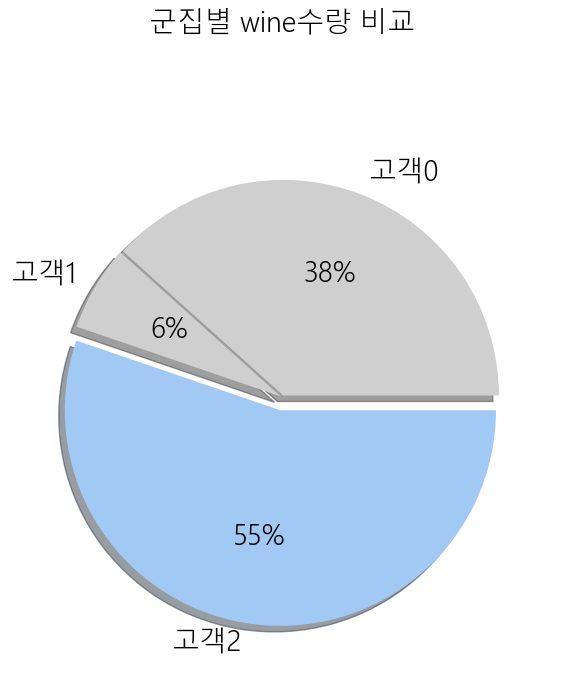

In [55]:
fig=plt.figure(figsize=(7,7))
ax=fig.subplots(1,1)




colors =[wb] * len(wine_li)
colors[np.argmax(wine_li)] = r

explode =[0.01] * len(wine_li)
explode[np.argmax(wine_li)] = 0.06

# pie 그리기
_=ax.pie(wine_li, labels = ['고객0', '고객1', '고객2'],
         colors = colors, autopct='%.0f%%', explode=explode, shadow=True,
         textprops = dict(size=20, weight=3))

# 제목
_=plt.title('군집별 wine수량 비교', pad=70,
             fontdict = dict(size=20, weight=3))


## 웹페이지 방문 비교&웹페이지를 통한 구매 비교 

고객1에서 매장을 가장 많이 방문하지만, 구매를 하진 않는다.

In [56]:
web_df = raw.groupby('label').mean()[['NumWebPurchases', 'NumWebVisitsMonth']]

In [57]:
diff = web_df['NumWebPurchases'] - web_df['NumWebVisitsMonth']
web_df['diff'] = diff * diff

web_df

,NumWebPurchases,NumWebVisitsMonth,diff
label,,,
0,5.592879,3.547988,4.181582
1,3.075277,6.295203,10.367925
2,5.920930,4.488372,2.052223


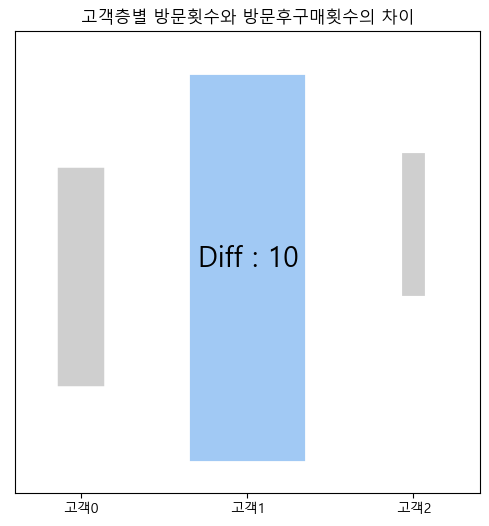

In [58]:
fig = plt.figure(figsize=(6,6))
ax = fig.subplots()

X = [0.5, 1, 1.5]
Y_purchase = web_df['NumWebPurchases'].values
Y_visit = web_df['NumWebVisitsMonth'].values

color = [wb, r, wb]

# ax.scatter(X, Y_purchase, marker='s', s=web_df['diff'].values*200, c=color)
# ax.scatter(X, Y_visit, marker='s', s=web_df['diff'].values*200, c=color)
_=ax.set_ylim(2.0, 7.5)
_=ax.set_xlim(0.3, 1.7)


for ii in range(len(web_df)):
    _=ax.plot([X[ii], X[ii]], [Y_purchase[ii], Y_visit[ii]],
              linewidth = web_df['diff'].values[ii]*8, color=color[ii])
_=ax.set_xticks([0.5, 1, 1.5])
_=ax.set_xticklabels(['고객0', '고객1', '고객2'])
_=ax.set_title('고객층별 방문횟수와 방문후구매횟수의 차이')
_=ax.axes.yaxis.set_visible(False)


for ind, x in enumerate(X) :
    if x == 1:
        _=ax.text(x-0.15, round((Y_purchase[ind]+Y_visit[ind])/2, 1),'Diff : {}'.format(round(web_df['diff'].values[ind])),
                   fontsize=round(web_df['diff'].values[ind])*2)

## 오프라인 비교 
- 매장에서 직접 구매
- 카탈로그

- 고객1집단이 상대적으로 offline으로 구매를 덜하고, 
- 고객0 집단이 상대적으로 offline으로 구매를 많이 한다.

<AxesSubplot:xlabel='NumStorePurchases', ylabel='NumCatalogPurchases'>

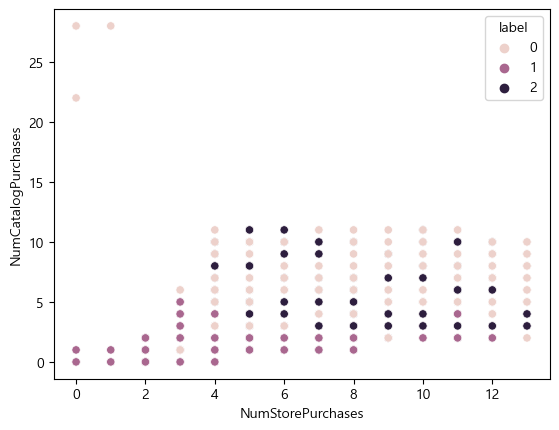

In [59]:
offline = ['NumStorePurchases', 'NumCatalogPurchases']

sns.scatterplot(data = raw, x='NumStorePurchases',
                y='NumCatalogPurchases',
                hue='label')

## 2번째 이벤트 참여도 압도적으로 낮다. 

고객2집단이 이벤트 참여도가 압도적으로 높다

In [60]:
sr3=raw.groupby(['label'])['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'].sum().sum(axis=1)
sr3

C:\Users\jihoo\AppData\Local\Temp\ipykernel_11128\270880505.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sr3=raw.groupby(['label'])['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'].sum().sum(axis=1)


label
0    138
1    119
2    404
dtype: int64

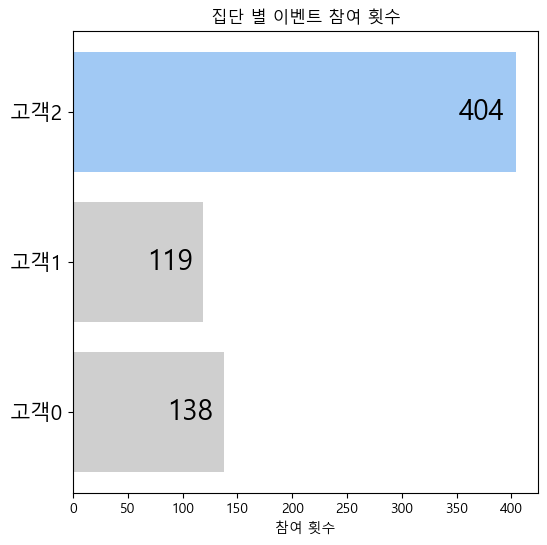

In [61]:
# 도화지
fig=plt.figure(figsize=(6,6))
ax=fig.subplots(1,1)


# 색 리스트

colors = [wb,wb,r]


# barh 그리기
bar=ax.barh(data=sr3, y=sr3.index, width=sr3.values, color=colors)


# y틱 조정
_=ax.set_yticks([0,1,2])
_=ax.set_yticklabels(['고객0','고객1','고객2'],fontdict=dict(size=15))


# x,y 제목
# _=ax.set_ylabel(False)
_=ax.set_xlabel('참여 횟수')


# barh에 숫자 넣기
i=0
for rect in bar:
    width = rect.get_width()
    _=plt.text(width-10, i, width, ha='right', va='center', size = 20)
    i+=1



# 제목
_=ax.set_title('집단 별 이벤트 참여 횟수')

## 1집단이 수입 낮음

In [62]:
sr4 = round(raw.groupby('label').mean()['Income']/1000, 1)
sr4

label
0    73.1
1    39.0
2    73.2
Name: Income, dtype: float64

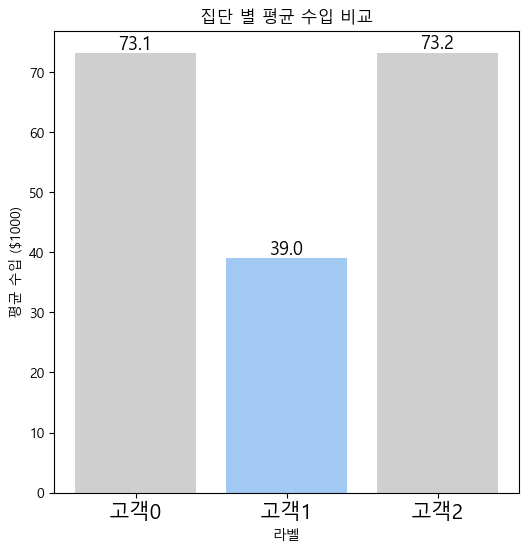

In [63]:
# 집단 별로 income의 mean을 구했습니다.

# 도화지
fig=plt.figure(figsize=(6,6))
ax=fig.subplots(1,1)


# 색 리스트

colors = [wb,r,wb]


# bar 그리기
bar=ax.bar(data=sr4, x=sr4.index, height=sr4.values, color = colors)


# x틱 조작
_=ax.set_xticks([0,1,2])
_=ax.set_xticklabels(['고객0','고객1','고객2'],fontdict=dict(size=15))


# x,y 제목
_=ax.set_xlabel('라벨')
_=ax.set_ylabel('평균 수입 ($1000)')


# bar에 숫자 넣기
for rect in bar:
    height = rect.get_height()
    _=plt.text(rect.get_x() + rect.get_width()/2.0, height, '{}'.format(height), ha='center', va='bottom', size = 13)
    

# 제목
_=ax.set_title('집단 별 평균 수입 비교')

## 학력수준 차이 및 비교

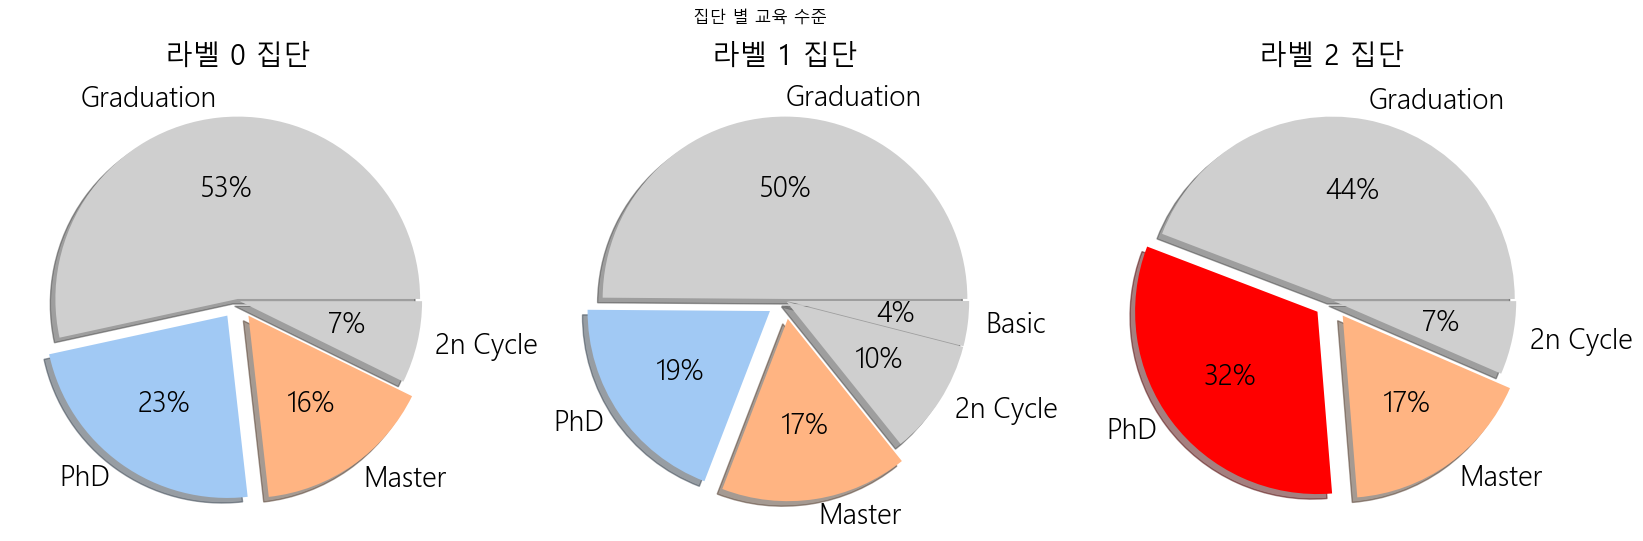

In [33]:
sr5=raw.groupby(['label'])['Education'].value_counts()

# 라벨별로
sr5_0 = sr5.loc[0]
sr5_1 = sr5.loc[1]
sr5_2 = sr5.loc[2]


# 도화지
fig=plt.figure(figsize=(20,6))
ax1,ax2,ax3=fig.subplots(1,3)


# 색 리스트

colors1 = [wb,r,p,wb]
colors2 = [wb,r,p,wb,wb]
colors3 = [wb,'red',p,wb]


# ax1
_=ax1.pie(sr5_0, labels = sr5_0.index, autopct='%.0f%%', colors=colors1, explode=[0.01, 0.1, 0.1, 0.01], shadow=True,
         textprops = dict(size=20, weight=3)
)
_=ax1.set_title('라벨 0 집단', fontdict=dict(size=20))


# ax2
_=ax2.pie(sr5_1, labels = sr5_1.index, autopct='%.0f%%', colors=colors2, explode=[0.01, 0.1, 0.1, 0.01, 0.01], shadow=True,
         textprops = dict(size=20, weight=3))
_=ax2.set_title('라벨 1 집단', fontdict=dict(size=20))


# ax3
_=ax3.pie(sr5_2, labels = sr5_2.index, autopct='%.0f%%', colors=colors3, explode=[0.01, 0.1, 0.1, 0.01], shadow=True,
         textprops = dict(size=20, weight=3))
_=ax3.set_title('라벨 2 집단', fontdict=dict(size=20))


# 제목
_=plt.suptitle('집단 별 교육 수준')

# 결과

In [65]:
# |특성|고객0|고객1|고객2|
# |---|---|---|---|
# |고객분류|직접고객|잠재고객|충성고객|
# |Income|▤| <span style="color:red">▼</span> |<span style="color:blue">▲</span>|
# |웹사이트방문|▤| <span style="color:blue">▲</span> |▤|
# |웹사이트방문후 구매|▤| <span style="color:red">▼</span> | ▤ |
# |wine구매|▤| ▤ | <span style="color:blue">▲</span> |
# |offline구매|<span style="color:blue">▲</span>| ▤ |<span style="color:red">▼</span>|
# |학렬수준 차이|▤| ▤ |<span style="color:blue">▲</span>|
# |가족들중 아이가 있는지|▤| <span style="color:blue">▲</span> |▤|

|특성|고객0|고객1|고객2|
|---|---|---|---|
|고객분류|직접고객|잠재고객|충성고객|
|Income|▤| <span style="color:red">▼</span> |<span style="color:blue">▲</span>|
|웹사이트방문|▤| <span style="color:blue">▲</span> |▤|
|웹사이트방문후 구매|▤| <span style="color:red">▼</span> | ▤ |
|wine구매|▤| ▤ | <span style="color:blue">▲</span> |
|offline구매|<span style="color:blue">▲</span>| ▤ |<span style="color:red">▼</span>|
|학렬수준 차이|▤| ▤ |<span style="color:blue">▲</span>|
|가족들중 아이가 있는지|▤| <span style="color:blue">▲</span> |▤|